# Facebook Recruiting IV: Human or Robot? Hosted on Kaggle

<br></br>
<img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/4294/media/robot_banner@.png" alt="Facebook Bots" title="Facebook Bots" />

## Project Overview
> from https://www.kaggle.com/c/facebook-recruiting-iv-human-or-bot/overview

There are two datasets in this competition. One is a bidder dataset that includes a list of bidder information, including their id, payment account, and address. The other is a bid dataset that includes 7.6 million bids on different auctions. The bids in this dataset are all made by mobile devices.

The online auction platform has a fixed increment of dollar amount for each bid, so it doesn't include an amount for each bid. You are welcome to learn the bidding behavior from the time of the bids, the auction, or the device. 

The data in this competition comes from an online platform, not from Facebook.

## Dataset Description

### <br>File descriptions</br>

- train.csv - the training set from the bidder dataset
- test.csv - the test set from the bidder dataset
- sampleSubmission.csv - a sample submission file in the correct format
- bids.csv - the bid dataset

### Data fields

#### For the bidder dataset

- bidder_id – Unique identifier of a bidder.
- payment_account – Payment account associated with a bidder. These are obfuscated to protect privacy. 
- address – Mailing address of a bidder. These are obfuscated to protect privacy. 
- outcome – Label of a bidder indicating whether or not it is a robot. Value 1.0 indicates a robot, where value 0.0 indicates human. 

The outcome was half hand labeled, half stats-based. There are two types of "bots" with different levels of proof:

1. Bidders who are identified as bots/fraudulent with clear proof. Their accounts were banned by the auction site.

2. Bidder who may have just started their business/clicks or their stats exceed from system wide average. There are no clear proof that they are bots. 



#### For the bid dataset

- bid_id - unique id for this bid
- bidder_id – Unique identifier of a bidder (same as the bidder_id used in train.csv and test.csv)
- auction – Unique identifier of an auction
- merchandise –  The category of the auction site campaign, which means the bidder might come to this site by way of searching for "home goods" but ended up bidding for "sporting goods" - and that leads to this field being "home goods". This categorical field could be a search term, or online advertisement. 
- device – Phone model of a visitor
- time - Time that the bid is made (transformed to protect privacy).
- country - The country that the IP belongs to
- ip – IP address of a bidder (obfuscated to protect privacy).
- url - url where the bidder was referred from (obfuscated to protect privacy). for this bid
- bidder_id – Unique identifier of a bidder (same as the bidder_id used in train.csv and test.csv)
- auction – Unique identifier of an auction
- merchandise –  The category of the auction site campaign, which means the bidder might come to this site by way of searching for "home goods" but ended up bidding for "sporting goods" - and that leads to this field being "home goods". This categorical field could be a search term, or online advertisement. 
- device – Phone model of a visitor
- time - Time that the bid is made (transformed to protect privacy).
- country - The country that the IP belongs to
- ip – IP address of a bidder (obfuscated to protect privacy).
- url - url where the bidder was referred from (obfuscated to protect privacy). 

## Introduction

When I initially started this project, my first hunch on what features could best identify bot users apart from humans primarily rested upon which categories bots tended to favor over humans. For example, I thought that one way to easily identify between the two populations could be to examine if there were any devices or auctions that bots heavily bid in over humans. However, soon I found out that these features tended to oversimplify the bidding nature of bots in the entire population by assuming that all bots behaved like bots in the training set. Given only 103 labeled bots out of 2013 labeled users (of those, only 1984 users were useful in making bids), it was definitely difficult to glean out what trends in bidding behavior separated bots and humans in general.

This was my primary challenge throughout this project: to make meaningful features from the small amount of data provided that did not overfit from training set. In this series of notebooks, I am presenting my approach to this project from start to finish, rather than a summary of my solution, so as to detail the obstacles I encountered and how I overcame them, which I believe best showcases my capacity for high quality data analytics.

# Notebook Contents
## Part I: Exploratory Data Analysis
## Part II: Feature Generation I
## Part III: Model Testing I
## Part IV: Feature Generation II
## Part V: Model Testing II
## Part VI: Hyperparameter Tuning

# Part I: Exploratory Data Analysis
#### *What information is included in the bidding log table? What's Missing? *

In [1129]:
# import standard libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

bids = pd.read_csv('datasets/bids.csv')
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [1130]:
train = pd.read_csv('datasets/train.csv')
train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [1131]:
test_df = pd.read_csv('datasets/test.csv')
test_df.head()

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


In [1132]:
test=pd.merge(test_df,bids,on=['bidder_id','bidder_id'],how='left')
print test.shape
test.head()

(4585180, 11)


,bidder_id,payment_account,address,bid_id,auction,merchandise,device,time,country,ip,url
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,2714053.0,cl3cf,home goods,phone169,9.633127e+15,us,128.59.117.159,8ohccaw6fhyc1gy
1,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,3785632.0,edggv,home goods,phone65,9.638908e+15,cn,254.171.78.220,vasstdc27m7nks3
2,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,5788255.0,jqx39,home goods,phone65,9.698805e+15,in,102.115.72.52,jezzg7twk0rqfuw
3,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,6575051.0,jqx39,home goods,phone65,9.703350e+15,cn,210.90.145.131,vasstdc27m7nks3
4,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,2536026.0,h2nr3,sporting goods,phone640,9.632413e+15,az,85.169.46.232,vasstdc27m7nks3


In [1133]:
# merged dataframes on bidder_id
merged=pd.merge(train,bids,on=['bidder_id','bidder_id'],how='left')
merged.head()

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3


In [1134]:
print "number of unique bidders in bids dataset"
print len(bids['bidder_id'].value_counts())

print "\nnumber of unique bidders in train dataset"
print len(train['bidder_id'].value_counts())

print "\nnumber of bot users in train dataset"
print len(train[train.outcome==1])

print "\nnumber of true users in train dataset"
print len(train[train.outcome==0])

print "\nnumber of unique bidders with train and bid datasets merged by inner join"
print len(pd.merge(train,bids,on=['bidder_id','bidder_id'],how='inner')['bidder_id'].value_counts())

print "\nnumber of unique bidders in test dataset"
print len(test_df['bidder_id'].value_counts())

print "\nnumber of unique bidders with test and bid sets merged by inner join"
print len(pd.merge(test_df,bids,on=['bidder_id','bidder_id'],how='inner')['bidder_id'].value_counts())

number of unique bidders in bids dataset
6614

number of unique bidders in train dataset
2013

number of bot users in train dataset
103

number of true users in train dataset
1910

number of unique bidders with train and bid datasets merged by inner join
1984

number of unique bidders in test dataset
4700

number of unique bidders with test and bid sets merged by inner join
4630


In [1135]:
print "number of rows in train merged dataset: {}".format(len(merged))
merged.nunique()

number of rows in train merged dataset: 3071253


bidder_id             2013
payment_account       2013
address               2013
outcome                  2
bid_id             3071224
auction              12740
merchandise             10
device                5729
time                742669
country                198
ip                 1030950
url                 663873
dtype: int64

In [1136]:
print "number of rows in test merged dataset: {}".format(len(test))
test.nunique()

number of rows in test merged dataset: 4585180


bidder_id             4700
payment_account       4700
address               4700
bid_id             4585110
auction              13999
merchandise              9
device                6574
time                768690
country                196
ip                 1545217
url                1174536
dtype: int64

In [1270]:
print "number of unique values in bids set"
bids.nunique()

number of unique values in bids set


bid_id              7656334
bidder_id              6614
auction               15051
merchandise              10
device                 7351
time                 776529
country                 199
ip                  2303991
url                 1786351
total_bids_by_id       1388
time_period               3
dtype: int64

In [1138]:
# check for null values in the training set
merged.isnull().sum()

bidder_id             0
payment_account       0
address               0
outcome               0
bid_id               29
auction              29
merchandise          29
device               29
time                 29
country            2730
ip                   29
url                  29
dtype: int64

In [1139]:
# missing values df
merged[merged.isnull().any(axis=1)].head()

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
435,fa64831ab5ade55daee13f852c16b0a84ujt0,3a0add7fb226e9f304c27e80d6d09bfbuarcp,8de27ed2fba662e2e1427856058fae573rszo,0.0,3663612.0,jqx39,mobile,phone106,9.637851e+15,NaN,129.60.14.86,p07idte94085bcb
770,fa64831ab5ade55daee13f852c16b0a84ujt0,3a0add7fb226e9f304c27e80d6d09bfbuarcp,8de27ed2fba662e2e1427856058fae573rszo,0.0,5482432.0,jqx39,mobile,phone65,9.696486e+15,NaN,80.165.83.13,rm77nw8nyin6vou
811,fa64831ab5ade55daee13f852c16b0a84ujt0,3a0add7fb226e9f304c27e80d6d09bfbuarcp,8de27ed2fba662e2e1427856058fae573rszo,0.0,5754111.0,jqx39,mobile,phone1146,9.698575e+15,NaN,22.25.169.40,rm77nw8nyin6vou
2505,d91a4421996dcf429f575e372915cdcedae6g,a3d2de7675556553a5f08e4c88d2c2286gew9,e350bda3ceb6067cad400ae931c3527aetdd8,0.0,38103.0,55y7n,office equipment,phone125,9.759356e+15,NaN,52.166.161.61,3u606u9e94v579x
2535,d91a4421996dcf429f575e372915cdcedae6g,a3d2de7675556553a5f08e4c88d2c2286gew9,e350bda3ceb6067cad400ae931c3527aetdd8,0.0,99655.0,1rc8d,office equipment,phone125,9.759534e+15,NaN,106.18.6.241,pdlypyh8d50omks


#### Observation:
There are 29 users in the training set that have not made any bids. These users will be excluded when training the model since no insights into bidding behavior can be made by them.

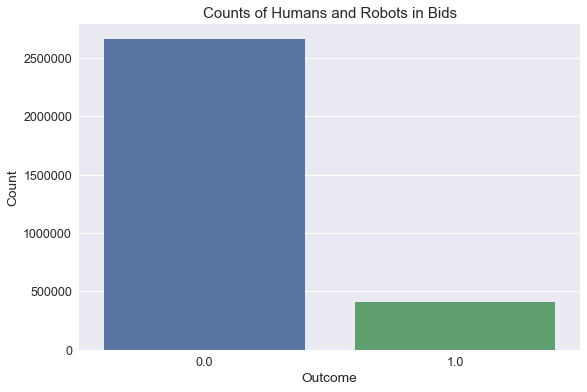

In [1140]:
plt.figure(figsize=(8,6))
sns.countplot('outcome',data=merged)
plt.title('Counts of Humans and Robots in Bids')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

## EDA Of Categorical Features

Each bidding log entry contains a few categorical features of how/where the bid was placed from. It may be useful to see if some of these elements are marked majoraly by bots rather than humans, or vice-versa.

### Country EDA

In [1141]:
# Country Site Analysis
print "number of unique countries"
print len(merged['country'].value_counts())
merged.groupby(['country','outcome'])['outcome'].count().head(10)

number of unique countries
198


country  outcome
ad       0.0           10
         1.0            4
ae       0.0        14330
         1.0         1335
af       0.0         1963
         1.0           92
ag       0.0            3
         1.0            6
al       0.0         2639
         1.0           60
Name: outcome, dtype: int64

In [1142]:
print "Top 10 robot bidding countries"
print merged[merged.outcome==1]['country'].value_counts().head(10)
print "\nTop 10 non-robot bidding countries"
print merged[merged.outcome==0]['country'].value_counts().head(10)
print "\nTop 10 bidding countries overall"
print merged['country'].value_counts().head(10)

Top 10 robot bidding countries
in    86386
us    66663
id    20495
de    18530
th    17282
za    13364
ru    11100
mx    10848
my    10488
ca     9205
Name: country, dtype: int64

Top 10 non-robot bidding countries
in    559245
ng    345411
id    153733
ke    146322
za    141974
gh    118398
vn     83300
tr     78220
my     77319
us     73380
Name: country, dtype: int64

Top 10 bidding countries overall
in    645631
ng    352263
id    174228
za    155338
ke    151707
us    140043
gh    118823
vn     90996
my     87807
tr     84896
Name: country, dtype: int64


In [1143]:
#percent bids by robot by country
perc_df_country=merged.groupby(['country','outcome'])['outcome'].count().to_frame().unstack(-1)
perc_df_country=perc_df_country.fillna(0)
perc_df_country['percent_robot_country']=perc_df_country.iloc[:,1]/(perc_df_country.iloc[:,0]+perc_df_country.iloc[:,1])
perc_df_country.sort_values(['percent_robot_country'],ascending=False).head(10)

outcome         percent_robot_country
outcome     0.0     1.0                      
country                                      
nc          0.0    11.0              1.000000
vi          0.0     8.0              1.000000
gi          0.0     1.0              1.000000
gp          0.0     2.0              1.000000
an          0.0     1.0              1.000000
aw          0.0     7.0              1.000000
tc          0.0     1.0              1.000000
mo          3.0   140.0              0.979021
jp        498.0  7921.0              0.940848
kr        634.0  6340.0              0.909091

In [1144]:
print "total countries: {}".format(len(perc_df_country))
print "total countries with 100% bids made from robots: {}".format(len(perc_df_country[perc_df_country.percent_robot_country==1]))
print "total countries with no bids made from robots: {}".format(len(perc_df_country[perc_df_country.percent_robot_country==0]))

total countries: 198
total countries with 100% bids made from robots: 7
total countries with no bids made from robots: 7


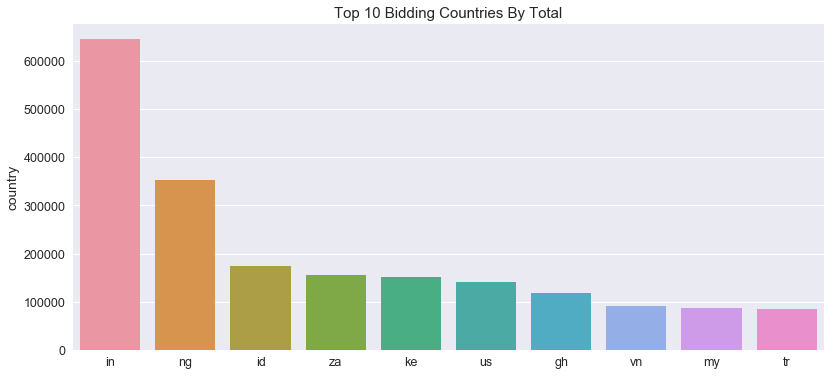

In [1145]:
plt.figure(figsize=(12,6))
plt.title('Top 10 Bidding Countries By Total')
sns.barplot(merged['country'].value_counts().head(10).index,\
            merged['country'].value_counts().head(10))

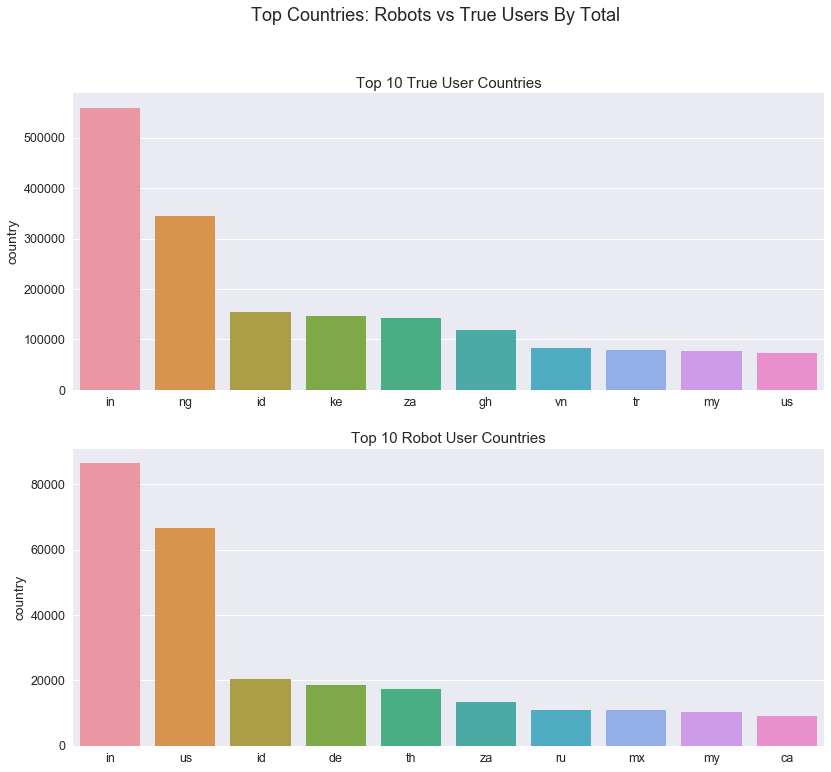

In [1146]:
plt.figure(figsize=(12,12))

plt.suptitle("Top Countries: Robots vs True Users By Total")

plt.subplot(211)
plt.title("Top 10 True User Countries")
sns.barplot(merged[merged.outcome==0]['country'].value_counts().head(10).index,\
           merged[merged.outcome==0]['country'].value_counts().head(10))

plt.subplot(212)
plt.title("Top 10 Robot User Countries")
sns.barplot(merged[merged.outcome==1]['country'].value_counts().head(10).index,\
           merged[merged.outcome==1]['country'].value_counts().head(10))

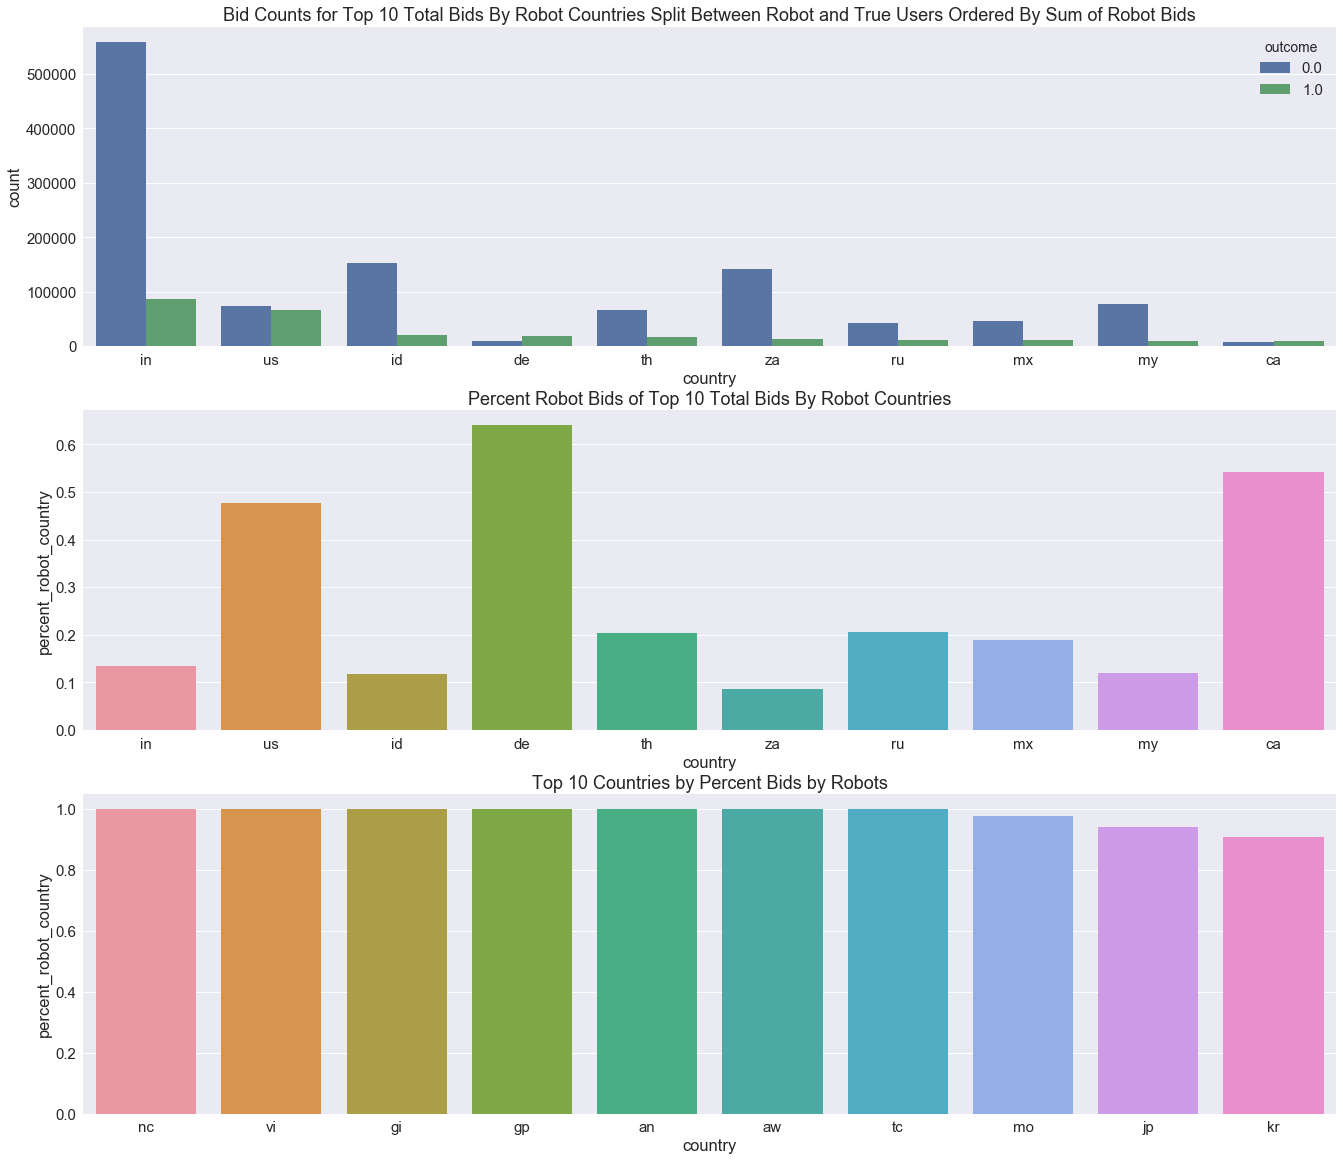

In [1147]:
top10_robot=merged[merged.outcome==1]['country'].value_counts().head(10).index.tolist()
top10_robot_percent=perc_df_country.sort_values(['percent_robot_country'],ascending=False).head(10)

plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
plt.subplot(311)
plt.title('Bid Counts for Top 10 Total Bids By Robot Countries Split Between Robot and True Users Ordered By Sum of Robot Bids')
sns.countplot('country',hue='outcome',data=merged.loc[merged['country'].isin(top10_robot)],\
             order=merged[merged.outcome==1]['country'].value_counts().head(10).index.tolist())

plt.subplot(312)
plt.title('Percent Robot Bids of Top 10 Total Bids By Robot Countries')
sns.barplot(perc_df_country.loc[top10_robot]['percent_robot_country'].index,perc_df_country.loc[top10_robot]['percent_robot_country'])

plt.subplot(313)
plt.title('Top 10 Countries by Percent Bids by Robots')
sns.barplot(top10_robot_percent.index.tolist(),top10_robot_percent['percent_robot_country'])
plt.xlabel('country')
plt.show()

#### Observation
Most of the Top 10 Countries have less than half of their users' bids coming from bots. There are some countries, however, that have all their users, or most of their users, as bots.

### Auction EDA

In [1148]:
# Auction Site Analysis
print "number of unique auction sites"
print len(merged['auction'].value_counts())
merged.groupby(['auction','outcome'])['outcome'].count().head(10)

number of unique auction sites
12740


auction  outcome
00270    0.0         21
         1.0        827
008vv    0.0          1
00cwr    0.0          6
00hjy    0.0         22
         1.0          3
00hm5    0.0         12
00llo    0.0          2
         1.0         14
00mip    1.0          1
Name: outcome, dtype: int64

In [1149]:
print "Top 10 robot bidding auction sites"
print merged[merged.outcome==1]['auction'].value_counts().head(10)
print "\nTop 10 non-robot bidding auction sites"
print merged[merged.outcome==0]['auction'].value_counts().head(10)
print "\nTop 10 bidding auction sites overall"
print merged['auction'].value_counts().head(10)

Top 10 robot bidding auction sites
jqx39    72963
1f9t0    11931
xsj5g     7561
r9bkk     5204
kxsj8     5002
5umtc     4879
rimjm     4721
s3k40     4250
uvnl7     3637
ngxwj     3016
Name: auction, dtype: int64

Top 10 non-robot bidding auction sites
jqx39    144950
jefix     38709
opnq4     34878
r9bkk     29805
no958     24503
uvnl7     22924
hy5xd     21952
ihm9a     20972
ngxwj     19923
pyqrm     19791
Name: auction, dtype: int64

Top 10 bidding auction sites overall
jqx39    217913
jefix     41473
opnq4     35183
r9bkk     35009
uvnl7     26561
no958     24960
ngxwj     22939
hy5xd     22013
ihm9a     20974
pyqrm     19804
Name: auction, dtype: int64


In [1150]:
#percent bids by robot by auction
perc_df_auction=merged.groupby(['auction','outcome'])['outcome'].count().to_frame().unstack(-1)
perc_df_auction=perc_df_auction.fillna(0)
perc_df_auction['percent_robot_auction']=perc_df_auction.iloc[:,1]/(perc_df_auction.iloc[:,0]+perc_df_auction.iloc[:,1])
perc_df_auction.sort_values(['percent_robot_auction'],ascending=False).head(10)

outcome        percent_robot_auction
outcome     0.0    1.0                      
auction                                     
ggobv       0.0   17.0                   1.0
rzb0b       0.0    1.0                   1.0
6nzcy       0.0    4.0                   1.0
shr2y       0.0    1.0                   1.0
sgk00       0.0  163.0                   1.0
6p1u3       0.0    2.0                   1.0
sf1lx       0.0    3.0                   1.0
sdtzu       0.0  135.0                   1.0
sd4zu       0.0    1.0                   1.0
scwgi       0.0    1.0                   1.0

In [1151]:
print "total auctions: {}".format(len(perc_df_auction))
print "total auctions with 100% bids made from auctions: {}".format(len(perc_df_auction[perc_df_auction.percent_robot_auction==1]))
print "total auctions with no bids made from robots: {}".format(len(perc_df_auction[perc_df_auction.percent_robot_auction==0]))

total auctions: 12740
total auctions with 100% bids made from auctions: 509
total auctions with no bids made from robots: 6350


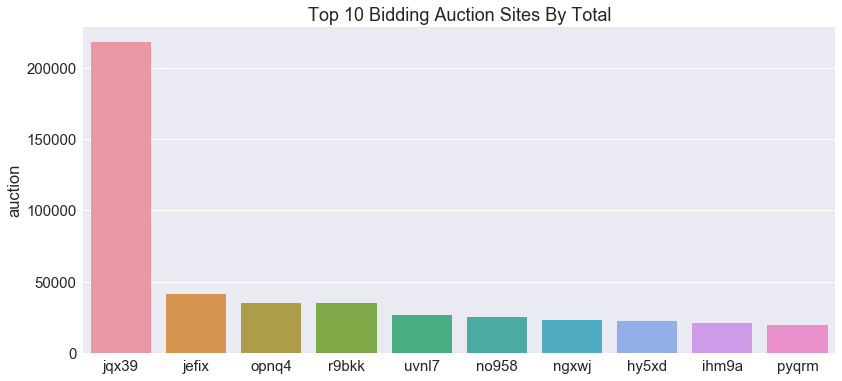

In [1152]:
plt.figure(figsize=(12,6))
plt.title('Top 10 Bidding Auction Sites By Total')
sns.barplot(merged['auction'].value_counts().head(10).index,\
            merged['auction'].value_counts().head(10))

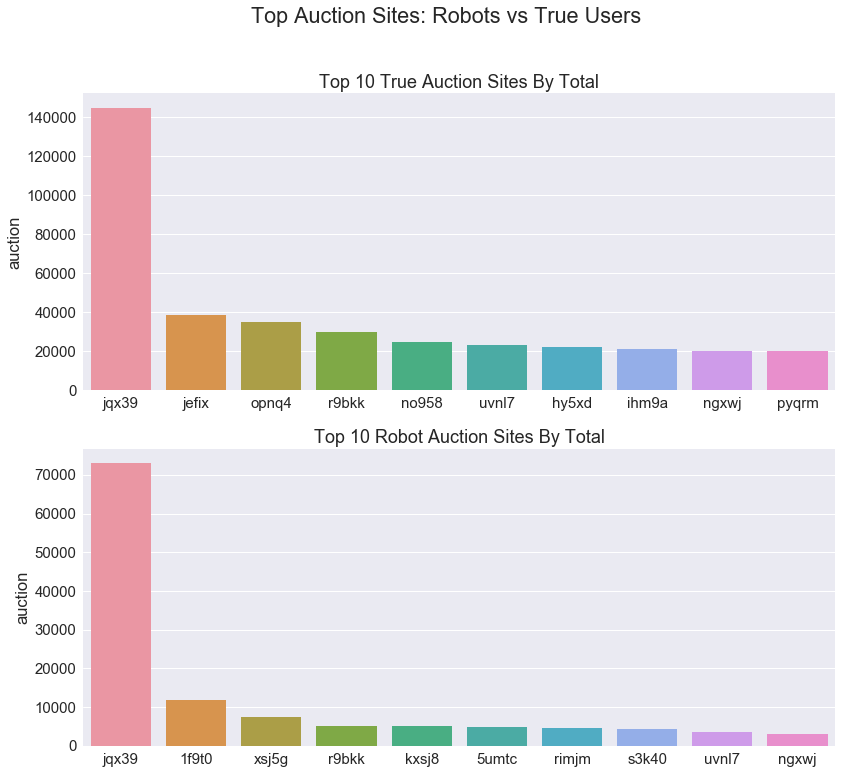

In [1153]:
plt.figure(figsize=(12,12))

plt.suptitle("Top Auction Sites: Robots vs True Users")

plt.subplot(211)
plt.title("Top 10 True Auction Sites By Total")
sns.barplot(merged[merged.outcome==0]['auction'].value_counts().head(10).index,\
           merged[merged.outcome==0]['auction'].value_counts().head(10))

plt.subplot(212)
plt.title("Top 10 Robot Auction Sites By Total")
sns.barplot(merged[merged.outcome==1]['auction'].value_counts().head(10).index,\
           merged[merged.outcome==1]['auction'].value_counts().head(10))



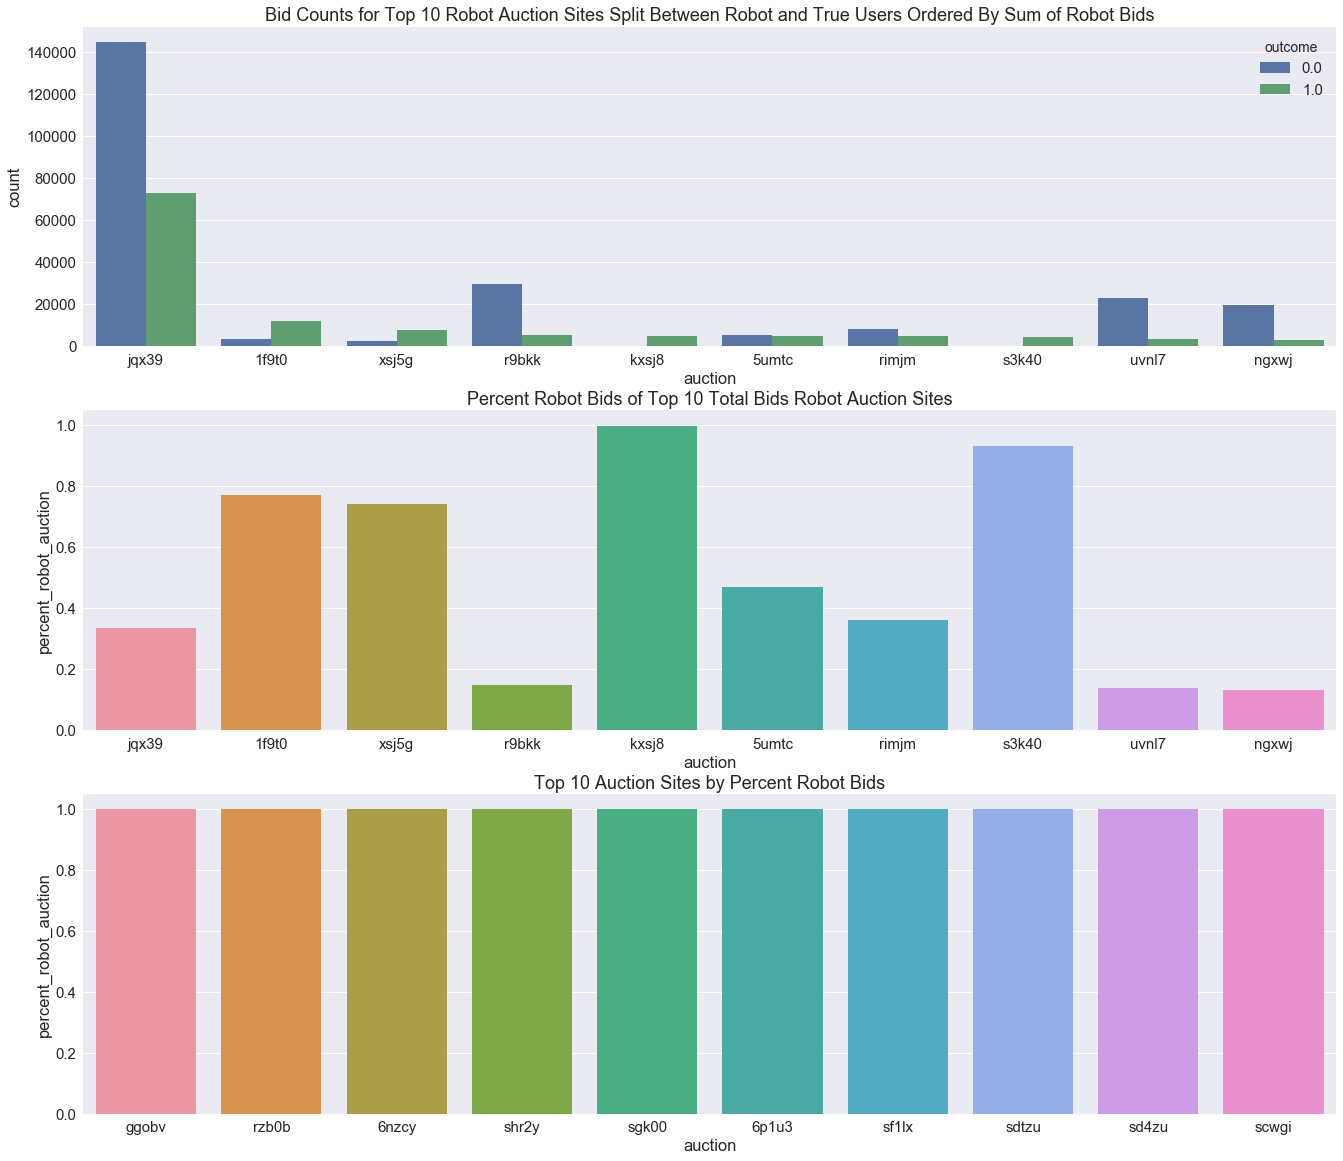

In [1154]:
top10_robot_au=merged[merged.outcome==1]['auction'].value_counts().head(10).index.tolist()
top10_robot_percent_au=perc_df_auction.sort_values(['percent_robot_auction'],ascending=False).head(10)

plt.figure(figsize=(20,20))

plt.subplot(311)
plt.title('Bid Counts for Top 10 Robot Auction Sites Split Between Robot and True Users Ordered By Sum of Robot Bids')
sns.countplot('auction',hue='outcome',data=merged.loc[merged['auction'].isin(top10_robot_au)],\
             order=merged[merged.outcome==1]['auction'].value_counts().head(10).index.tolist())

plt.subplot(312)
plt.title('Percent Robot Bids of Top 10 Total Bids Robot Auction Sites')
sns.barplot(perc_df_auction.loc[top10_robot_au]['percent_robot_auction'].index,perc_df_auction.loc[top10_robot_au]['percent_robot_auction'])

plt.subplot(313)
plt.title('Top 10 Auction Sites by Percent Robot Bids')
sns.barplot(top10_robot_percent_au.index.tolist(),top10_robot_percent_au['percent_robot_auction'])
plt.xlabel('auction')
plt.show()

#### Observation
Unlike the top 10 robot bidding by sum popular countries, there are more top robot bidding by sum auctions that are largely bidded by bots over humans.

### Merchandise Category EDA

In [1155]:
# Merchandise Category Analysis
print "number of unique categories"
print len(merged['merchandise'].value_counts())
merged.groupby(['merchandise','outcome'])['outcome'].count().head(10)

number of unique categories
10


merchandise      outcome
auto parts       0.0          9757
books and music  0.0         13733
                 1.0          1509
clothing         0.0           476
computers        0.0          9733
                 1.0         11667
furniture        0.0         87807
home goods       0.0        389249
                 1.0         18708
jewelry          0.0        555634
Name: outcome, dtype: int64

In [1156]:
print "Top 10 robot bidding merch categories"
print merged[merged.outcome==1]['merchandise'].value_counts().head(10)
print "\nTop 10 non-robot merch categories"
print merged[merged.outcome==0]['merchandise'].value_counts().head(10)
print "\nTop 10 bidding merch categories overall"
print merged['merchandise'].value_counts().head(10)

Top 10 robot bidding merch categories
sporting goods      230326
mobile              105138
jewelry              37101
home goods           18708
computers            11667
office equipment      7967
books and music       1509
Name: merchandise, dtype: int64

Top 10 non-robot merch categories
sporting goods      939398
jewelry             555634
mobile              492350
home goods          389249
office equipment    160671
furniture            87807
books and music      13733
auto parts            9757
computers             9733
clothing               476
Name: merchandise, dtype: int64

Top 10 bidding merch categories overall
sporting goods      1169724
mobile               597488
jewelry              592735
home goods           407957
office equipment     168638
furniture             87807
computers             21400
books and music       15242
auto parts             9757
clothing                476
Name: merchandise, dtype: int64


In [1157]:
#percent bids by robot by merchandise
perc_df_merch=merged.groupby(['merchandise','outcome'])['outcome'].count().to_frame().unstack(-1)
perc_df_merch=perc_df_merch.fillna(0)
perc_df_merch['percent_robot_merch']=perc_df_merch.iloc[:,1]/(perc_df_merch.iloc[:,0]+perc_df_merch.iloc[:,1])
perc_df_merch.sort_values(['percent_robot_merch'],ascending=False)

outcome           percent_robot_merch
outcome                0.0       1.0                    
merchandise                                             
computers           9733.0   11667.0            0.545187
sporting goods    939398.0  230326.0            0.196906
mobile            492350.0  105138.0            0.175967
books and music    13733.0    1509.0            0.099003
jewelry           555634.0   37101.0            0.062593
office equipment  160671.0    7967.0            0.047243
home goods        389249.0   18708.0            0.045858
auto parts          9757.0       0.0            0.000000
clothing             476.0       0.0            0.000000
furniture          87807.0       0.0            0.000000

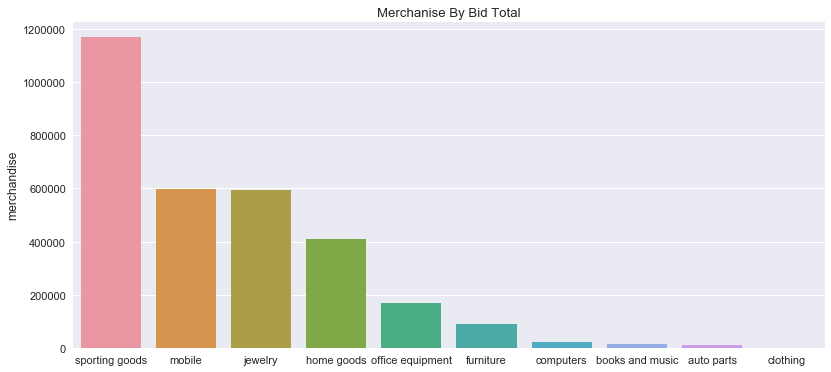

In [1158]:
sns.set(font_scale=1.1)
plt.figure(figsize=(12,6))
plt.title('Merchanise By Bid Total')
sns.barplot(merged['merchandise'].value_counts().head(10).index,\
            merged['merchandise'].value_counts().head(10))

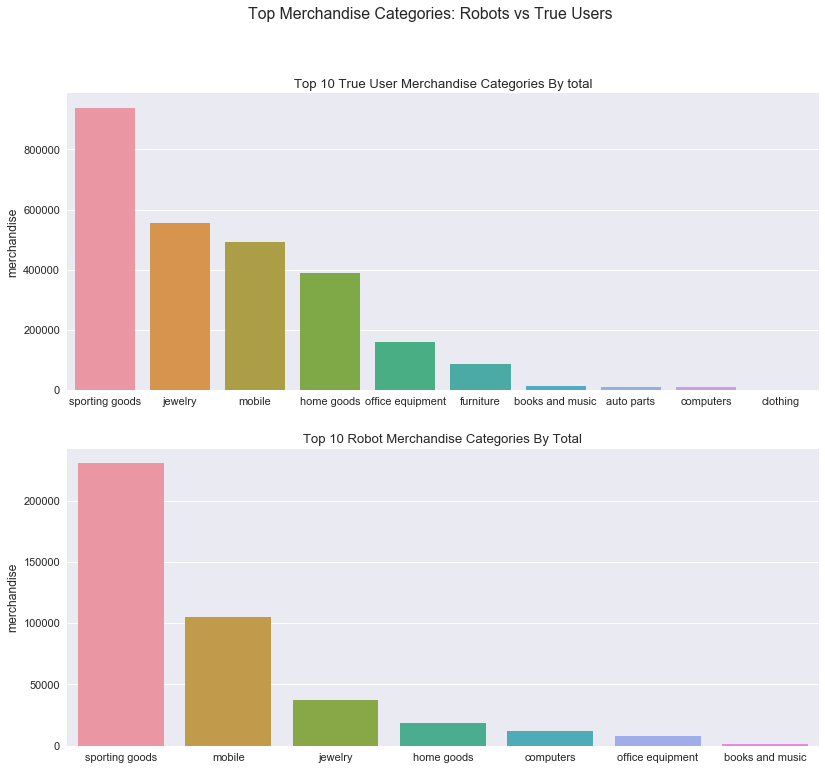

In [1159]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.10)

plt.suptitle("Top Merchandise Categories: Robots vs True Users")

plt.subplot(211)
plt.title("Top 10 True User Merchandise Categories By total")
sns.barplot(merged[merged.outcome==0]['merchandise'].value_counts().head(10).index,\
           merged[merged.outcome==0]['merchandise'].value_counts().head(10))

plt.subplot(212)
plt.title("Top 10 Robot Merchandise Categories By Total")
sns.barplot(merged[merged.outcome==1]['merchandise'].value_counts().head(10).index,\
           merged[merged.outcome==1]['merchandise'].value_counts().head(10))


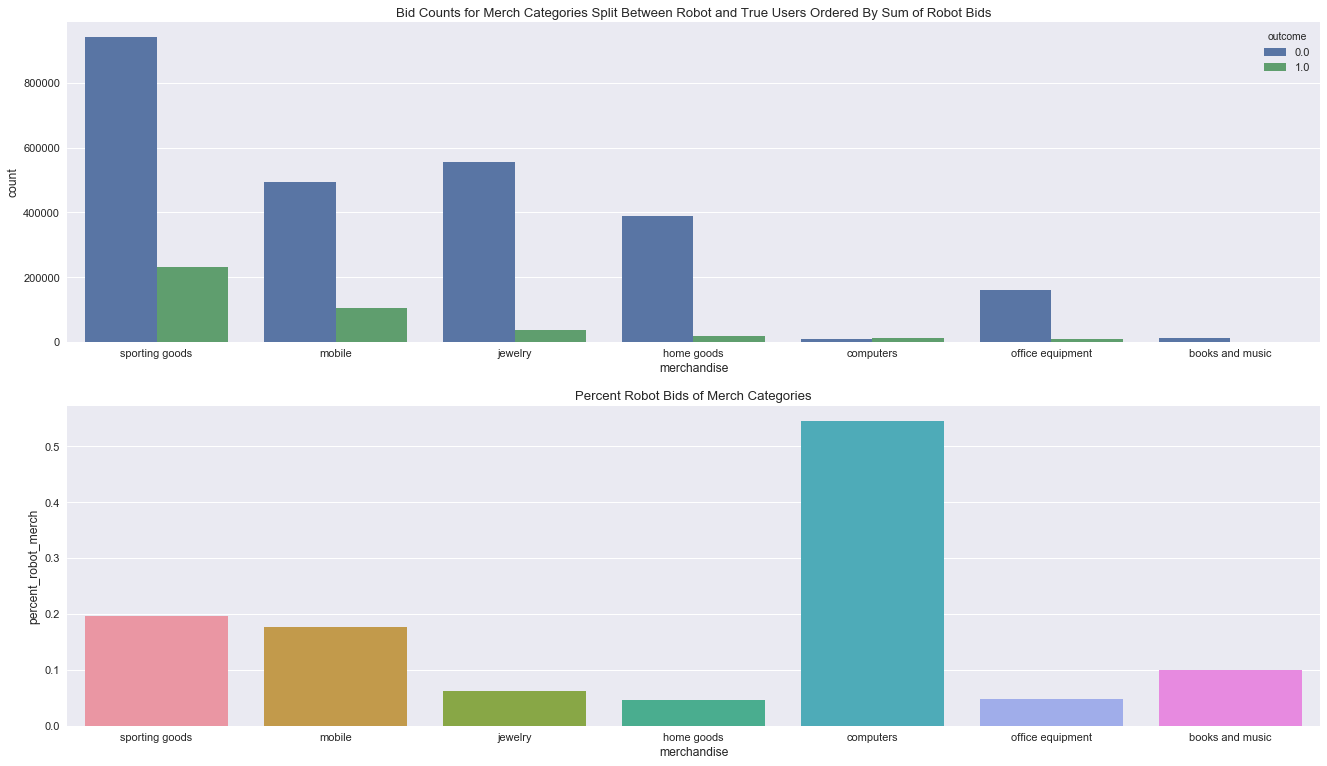

In [1160]:
top10_robot_me=merged[merged.outcome==1]['merchandise'].value_counts().head(10).index.tolist()
top10_robot_percent_me=perc_df_merch.sort_values(['percent_robot_merch'],ascending=False).head(10)

plt.figure(figsize=(20,20))

plt.subplot(311)
plt.title('Bid Counts for Merch Categories Split Between Robot and True Users Ordered By Sum of Robot Bids')
sns.countplot('merchandise',hue='outcome',data=merged.loc[merged['merchandise'].isin(top10_robot_me)],\
             order=merged[merged.outcome==1]['merchandise'].value_counts().head(10).index.tolist())

plt.subplot(312)
plt.title('Percent Robot Bids of Merch Categories')
sns.barplot(perc_df_merch.loc[top10_robot_me]['percent_robot_merch'].index,perc_df_merch.loc[top10_robot_me]['percent_robot_merch'])

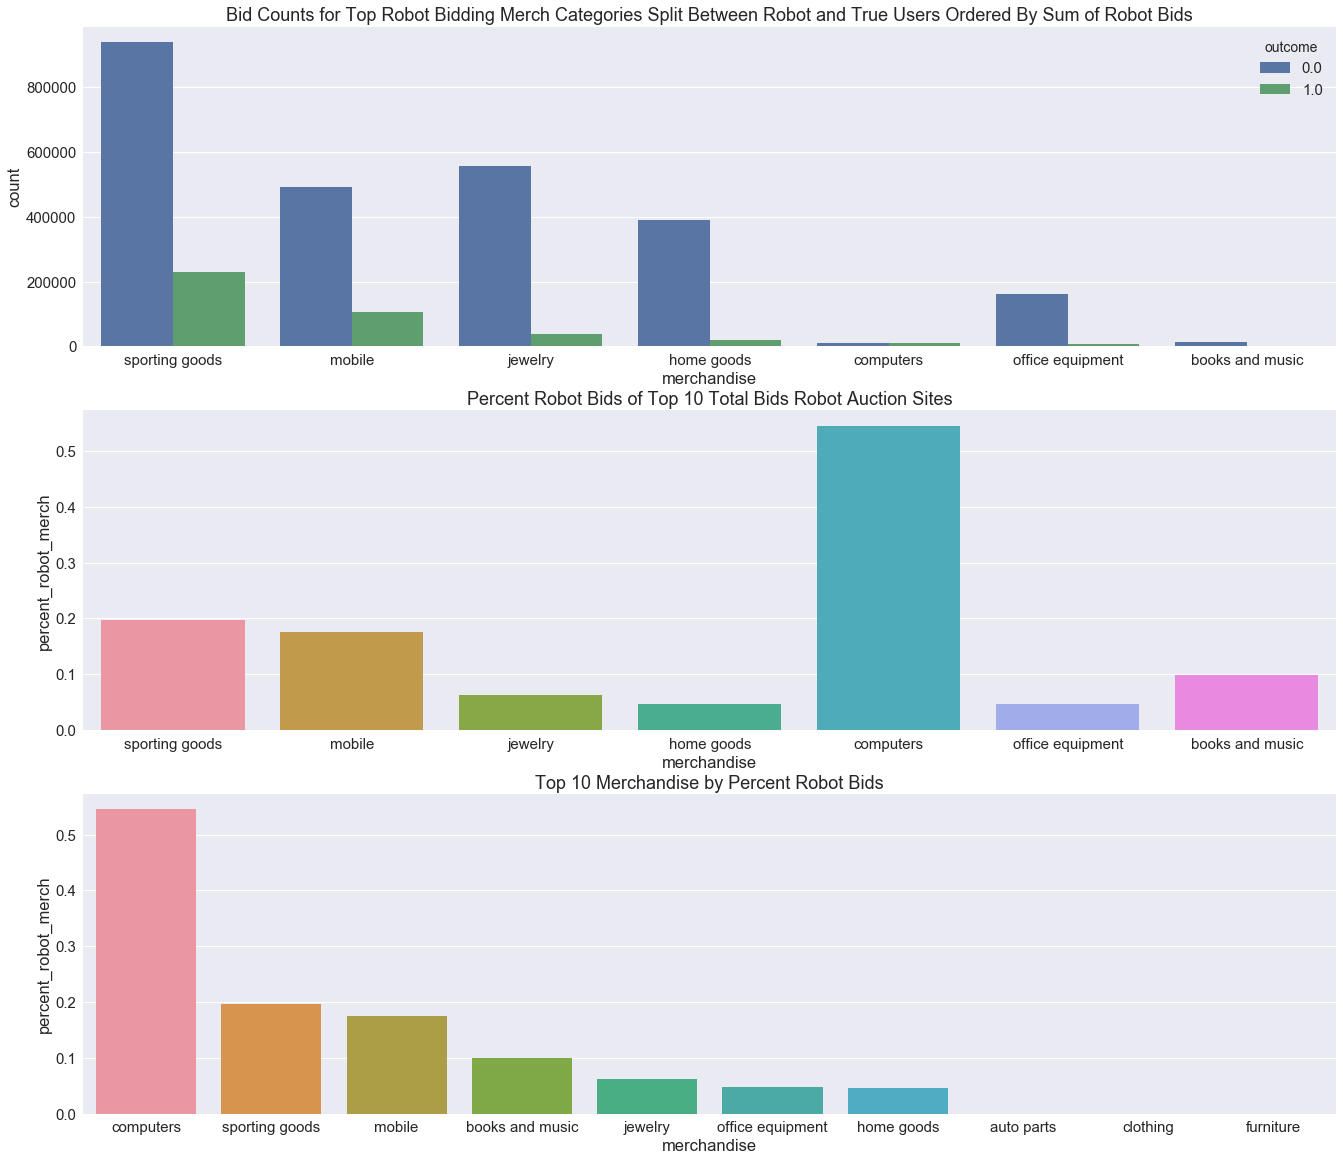

In [1161]:
top10_robot_me=merged[merged.outcome==1]['merchandise'].value_counts().head(10).index.tolist()
top10_robot_percent_me=perc_df_merch.sort_values(['percent_robot_merch'],ascending=False).head(10)

plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
plt.subplot(311)
plt.title('Bid Counts for Top Robot Bidding Merch Categories Split Between Robot and True Users Ordered By Sum of Robot Bids')
sns.countplot('merchandise',hue='outcome',data=merged.loc[merged['merchandise'].isin(top10_robot_me)],\
             order=merged[merged.outcome==1]['merchandise'].value_counts().head(10).index.tolist())

plt.subplot(312)
plt.title('Percent Robot Bids of Top 10 Total Bids Robot Auction Sites')
sns.barplot(perc_df_merch.loc[top10_robot_me]['percent_robot_merch'].index,perc_df_merch.loc[top10_robot_me]['percent_robot_merch'])

plt.subplot(313)
plt.title('Top 10 Merchandise by Percent Robot Bids')
sns.barplot(top10_robot_percent_me.index.tolist(),top10_robot_percent_me['percent_robot_merch'])
plt.xlabel('merchandise')
plt.show()

#### Observation
Robots outbid real users slightly in computer parts. Auto parts, clothing, and furniture are entirely bought through real users. It doesn't look like any feature derived from merchandise is going to be useful and separating bots from true users.

### Device EDA

In [1163]:
# device
print "number of unique devices"
print len(merged['device'].value_counts())
merged.groupby(['device','outcome'])['outcome'].count().head(10)

number of unique devices
5729


device     outcome
phone0     0.0        21165
           1.0          197
phone1     0.0         8162
           1.0          485
phone10    0.0          288
           1.0            7
phone100   0.0           89
           1.0            1
phone1000  0.0           77
phone1001  0.0            3
Name: outcome, dtype: int64

In [1164]:
print "Top 10 robot bidding devices"
print merged[merged.outcome==1]['device'].value_counts().head(10)
print "\nTop 10 non-robot bidding devices"
print merged[merged.outcome==0]['device'].value_counts().head(10)
print "\nTop 10 bidding devices overall"
print merged['device'].value_counts().head(10)

Top 10 robot bidding devices
phone17     16219
phone119    14833
phone46     14550
phone4      14102
phone65      9965
phone62      9406
phone13      8923
phone28      7721
phone115     4773
phone122     4752
Name: device, dtype: int64

Top 10 non-robot bidding devices
phone4      292896
phone35      72868
phone101     67205
phone2       62811
phone45      61580
phone65      50729
phone25      49504
phone3       45824
phone5       35559
phone22      35202
Name: device, dtype: int64

Top 10 bidding devices overall
phone4      306998
phone35      75542
phone101     69757
phone2       67208
phone45      64172
phone65      60694
phone25      53390
phone3       50151
phone17      43036
phone22      37187
Name: device, dtype: int64


In [1165]:
#percent bids by robot by device
perc_df_device=merged.groupby(['device','outcome'])['outcome'].count().to_frame().unstack(-1)
perc_df_device=perc_df_device.fillna(0)
perc_df_device['percent_robot_device']=perc_df_device.iloc[:,1]/(perc_df_device.iloc[:,0]+perc_df_device.iloc[:,1])
perc_df_device.sort_values(['percent_robot_device'],ascending=False).head(10)

outcome      percent_robot_device
outcome       0.0  1.0                     
device                                     
phone4361     0.0  3.0                  1.0
phone7421     0.0  1.0                  1.0
phone3319     0.0  3.0                  1.0
phone1352     0.0  8.0                  1.0
phone7384     0.0  2.0                  1.0
phone5502     0.0  2.0                  1.0
phone7386     0.0  1.0                  1.0
phone7388     0.0  1.0                  1.0
phone2335     0.0  1.0                  1.0
phone4671     0.0  4.0                  1.0

In [1166]:
print "total devices: {}".format(len(perc_df_device))
print "total devices with 100% bids made from robots: {}".format(len(perc_df_device[perc_df_device.percent_robot_device==1]))
print "total devices with no bids made from robots: {}".format(len(perc_df_device[perc_df_device.percent_robot_device==0]))

total devices: 5729
total devices with 100% bids made from robots: 576
total devices with no bids made from robots: 2651


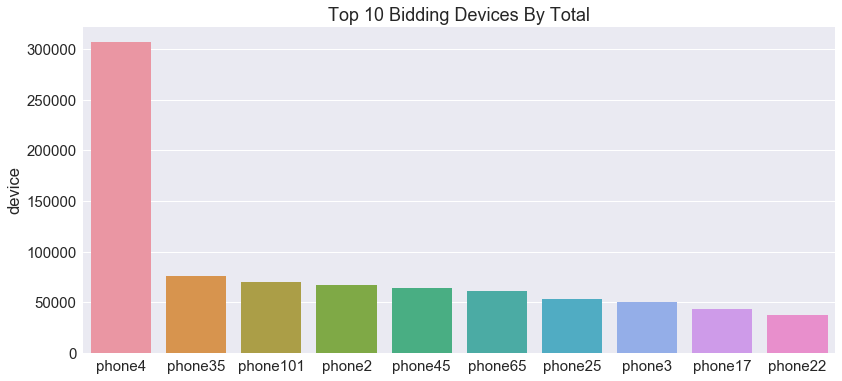

In [1167]:
plt.figure(figsize=(12,6))
plt.title('Top 10 Bidding Devices By Total')
sns.barplot(merged['device'].value_counts().head(10).index,\
            merged['device'].value_counts().head(10))

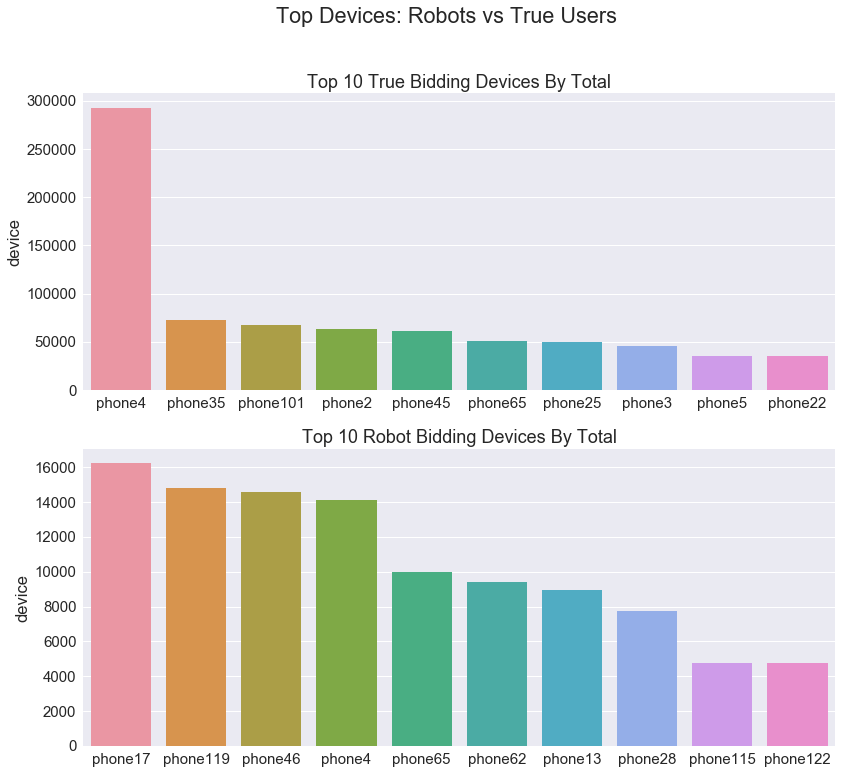

In [1168]:
plt.figure(figsize=(12,12))

plt.suptitle("Top Devices: Robots vs True Users")

plt.subplot(211)
plt.title("Top 10 True Bidding Devices By Total")
sns.barplot(merged[merged.outcome==0]['device'].value_counts().head(10).index,\
           merged[merged.outcome==0]['device'].value_counts().head(10))

plt.subplot(212)
plt.title("Top 10 Robot Bidding Devices By Total")
sns.barplot(merged[merged.outcome==1]['device'].value_counts().head(10).index,\
           merged[merged.outcome==1]['device'].value_counts().head(10))



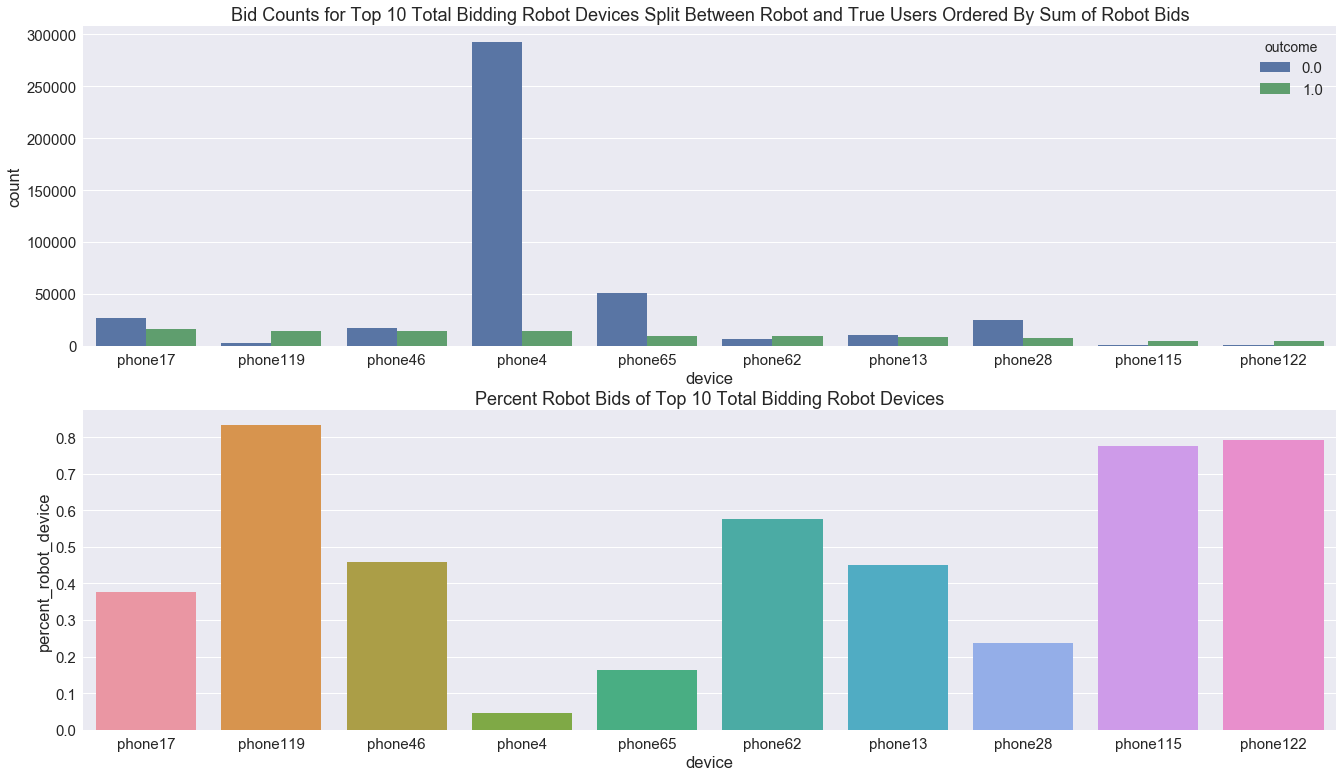

In [1169]:
top10_device=merged[merged.outcome==1]['device'].value_counts().head(10).index.tolist()
top10_device_percent=perc_df_device.sort_values(['percent_robot_device'],ascending=False).head(10)

plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
plt.subplot(311)
plt.title('Bid Counts for Top 10 Total Bidding Robot Devices Split Between Robot and True Users Ordered By Sum of Robot Bids')
sns.countplot('device',hue='outcome',data=merged.loc[merged['device'].isin(top10_device)],\
             order=merged[merged.outcome==1]['device'].value_counts().head(10).index.tolist())

plt.subplot(312)
plt.title('Percent Robot Bids of Top 10 Total Bidding Robot Devices')
sns.barplot(perc_df_device.loc[top10_device]['percent_robot_device'].index,perc_df_device.loc[top10_device]['percent_robot_device'])

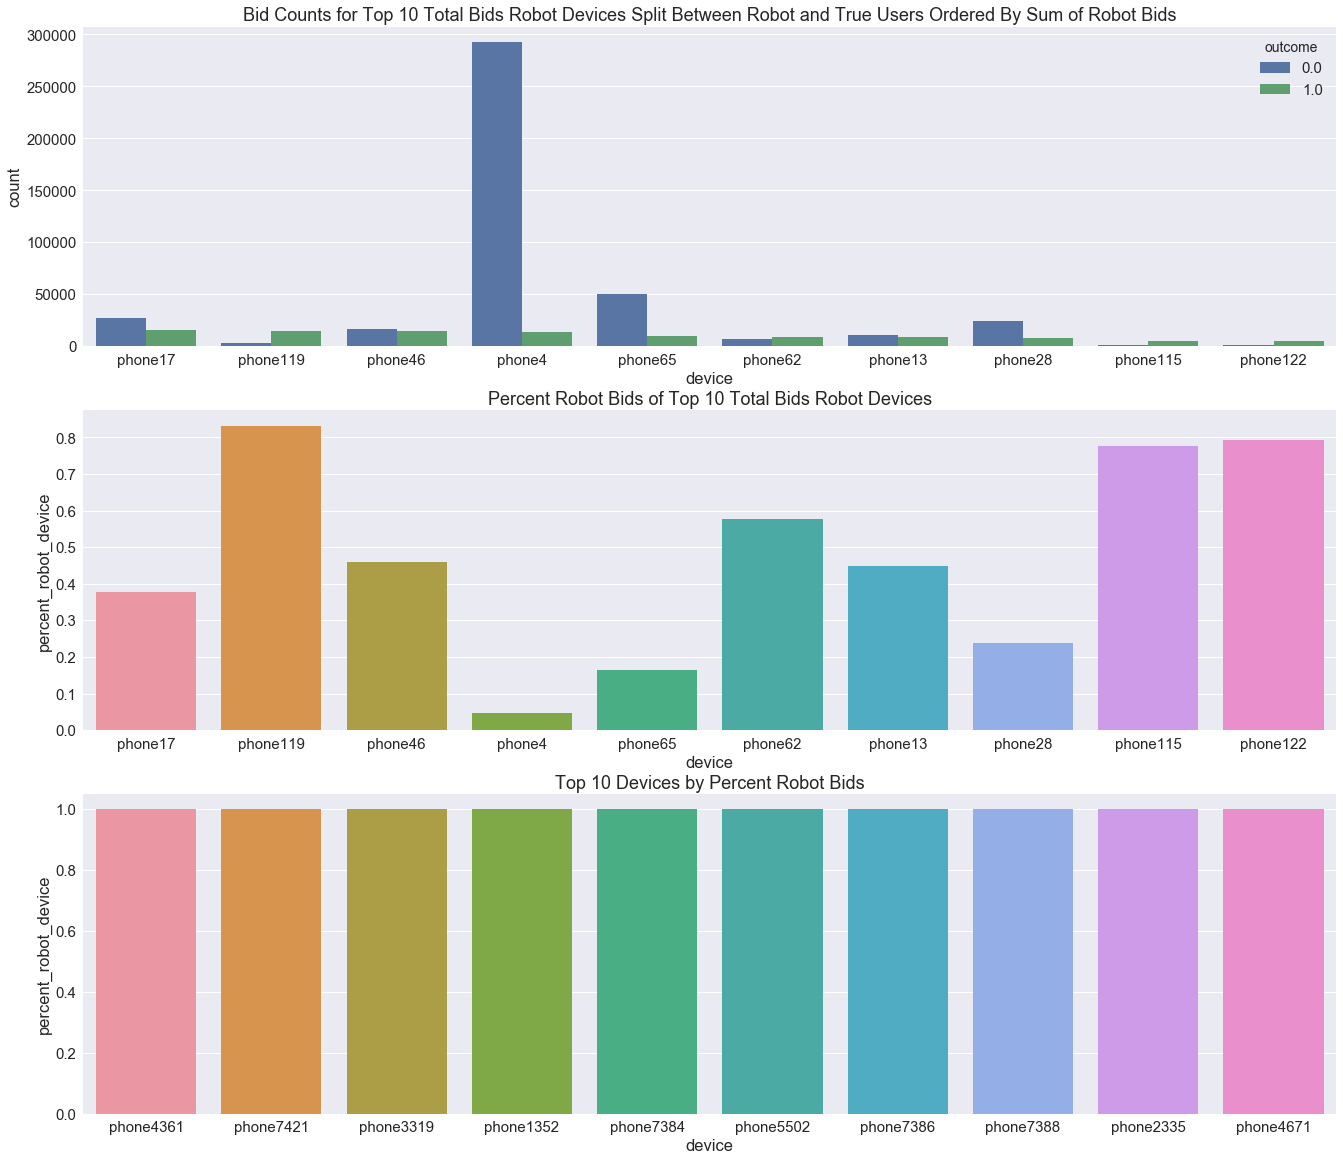

In [1286]:
top10_device=merged[merged.outcome==1]['device'].value_counts().head(10).index.tolist()
top10_device_percent=perc_df_device.sort_values(['percent_robot_device'],ascending=False).head(10)

plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
plt.subplot(311)
plt.title('Bid Counts for Top 10 Total Bids Robot Devices Split Between Robot and True Users Ordered By Sum of Robot Bids')
sns.countplot('device',hue='outcome',data=merged.loc[merged['device'].isin(top10_device)],\
             order=merged[merged.outcome==1]['device'].value_counts().head(10).index.tolist())

plt.subplot(312)
plt.title('Percent Robot Bids of Top 10 Total Bids Robot Devices')
sns.barplot(perc_df_device.loc[top10_device]['percent_robot_device'].index,perc_df_device.loc[top10_device]['percent_robot_device'])

plt.subplot(313)
plt.title('Top 10 Devices by Percent Robot Bids')
sns.barplot(top10_device_percent.index.tolist(),top10_device_percent['percent_robot_device'])
plt.xlabel('device')
plt.show()

#### Observation
Like some auction sites, some devices are nearly entirely used by bots. Out of the categorical features looked at, device and auction seem to be the most useful for feature generation. 

## EDA: Making Sense of Time
The bid logs give time in a scale that does not translate into standard units of time. However, time-sensitive features can give a lot of insight into whether a user is a bot or a human. When bots in an auction come to mind, I imagine the automated capabilities of bots to potentially make several bids in a short amount of time, or to make bids at time sensitive parts of an auction, such as at the beginning or end. Making meaning of time is going to provide a lot of value when generating features, so investigating how the time scale was created is an imperative.

In [1171]:
#total bids made by bid id
total_bids_by_id=bids.groupby("bidder_id")["bid_id"].count().sort_values(ascending=False).to_frame().reset_index()
total_bids_by_id.columns=["bidder_id","total_bids_by_id"]
bids = pd.merge(bids,total_bids_by_id,on=['bidder_id','bidder_id'],how='left')
bids['total_bids_by_id'].fillna(0,inplace=True)

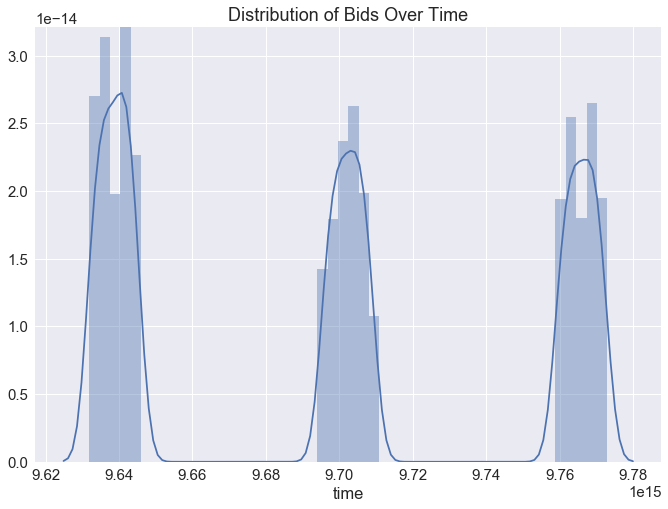

In [1172]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Bids Over Time")
sns.distplot(bids['time'])

#### Observation
There are 3 distributions of when bids are are being placed. I interpret this as three different cycles that the auction site hosted. It may be a good idea to also look into the distribution of bids placed in each cycle in total as well as bots vs humans.

In [1173]:
#converting the bids time series into scientific notation
bids['time']=bids['time'].apply(lambda x: x/(1.0 * 10 ** 15))
bids['time_period'] = bids['time'].map(lambda x: 1 if x<9.67 else 2 if x<9.73 else 3)

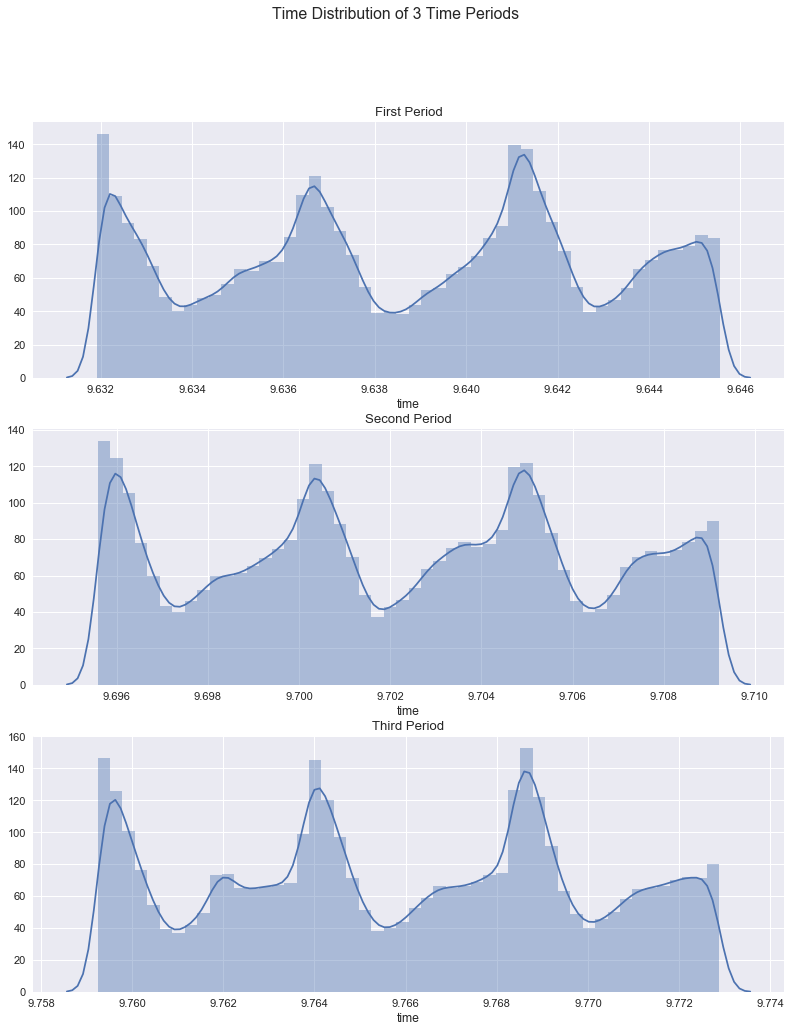

In [1174]:
plt.figure(figsize=(12,16))
sns.set(font_scale=1.1)
plt.suptitle("Time Distribution of 3 Time Periods")

plt.subplot(311)
plt.title("First Period")
sns.distplot(bids[bids.time_period==1]['time'])

plt.subplot(312)
plt.title("Second Period")
sns.distplot(bids[bids.time_period==2]['time'])

plt.subplot(313)
plt.title("Third Period")
sns.distplot(bids[bids.time_period==3]['time'])


In [1175]:
time_buyer_df=pd.merge(train,bids,on=['bidder_id','bidder_id'],how='inner')

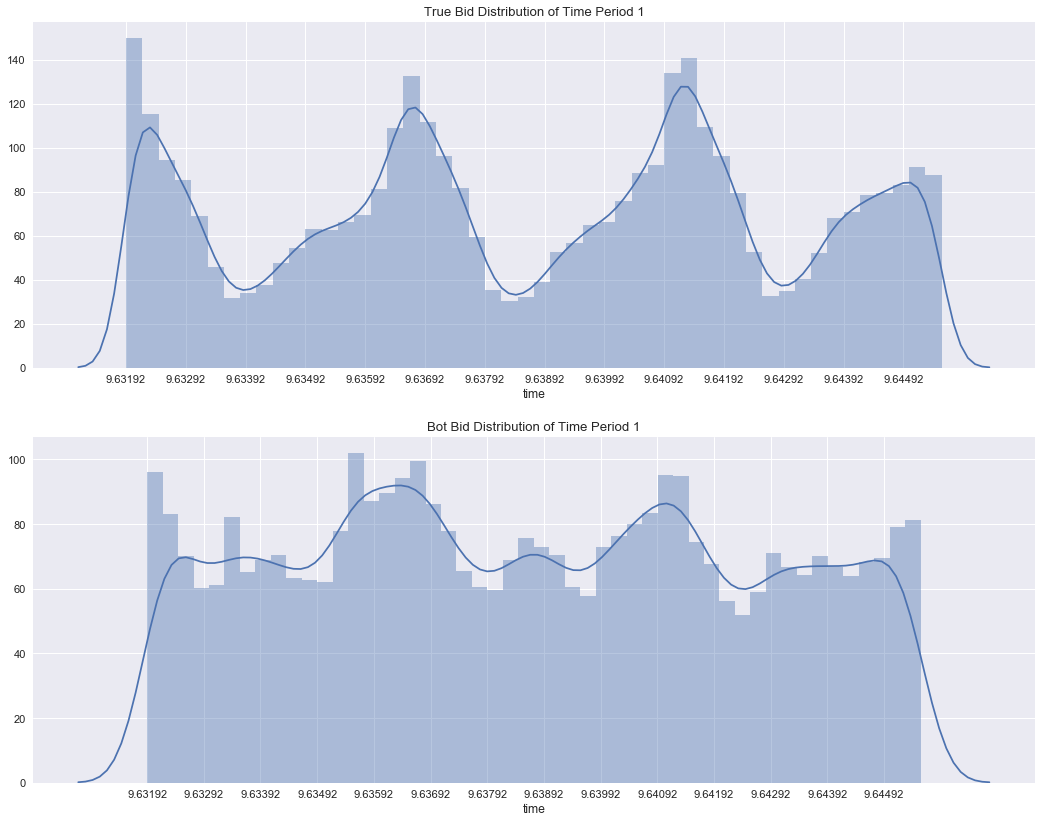

In [1176]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

true_buyer_time1=time_buyer_df[(time_buyer_df.time_period==1)&(time_buyer_df.outcome==0)]['time']
bot_buyer_time1=time_buyer_df[(time_buyer_df.time_period==1)&(time_buyer_df.outcome==1)]['time']

plt.figure(figsize=(16,14))


plt.subplot(211)
plt.title("True Bid Distribution of Time Period 1")
sns.distplot(true_buyer_time)
plt.xticks(np.arange(min(true_buyer_time1), max(true_buyer_time1), 0.001))


plt.subplot(212)
plt.title("Bot Bid Distribution of Time Period 1")
sns.distplot(bot_buyer_time1)
plt.xticks(np.arange(min(bot_buyer_time1), max(bot_buyer_time1), 0.001))

plt.show()

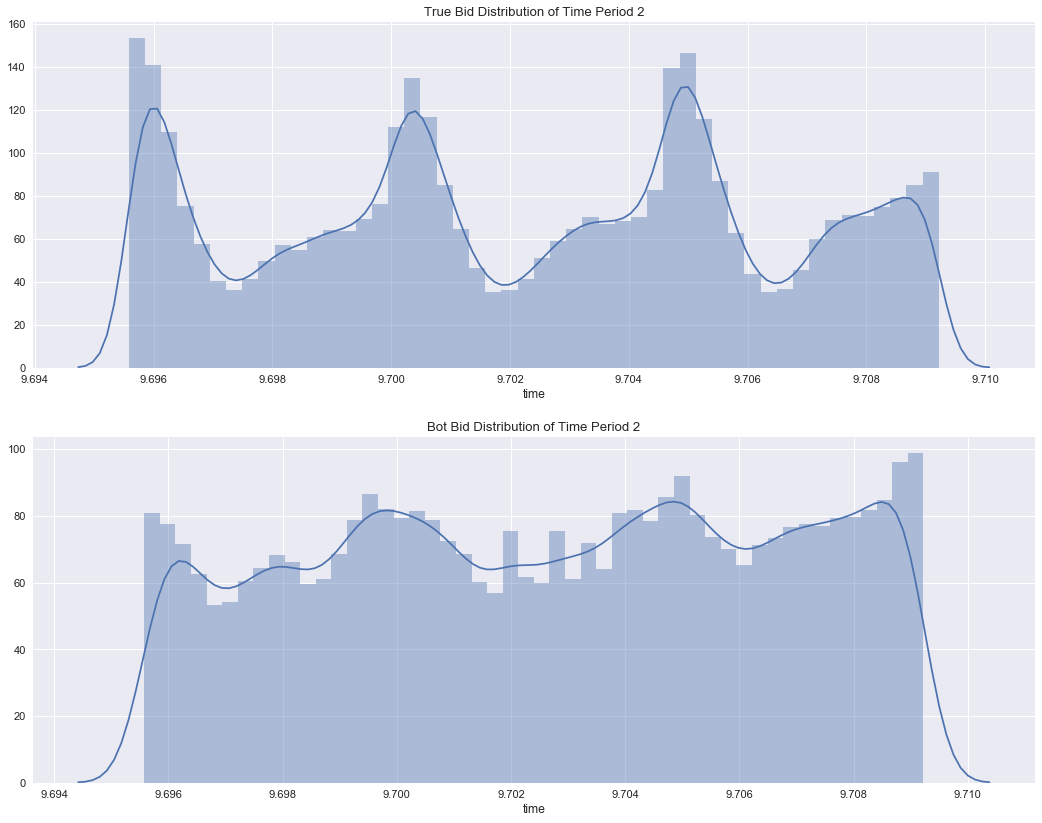

In [1178]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

true_buyer_time2=time_buyer_df[(time_buyer_df.time_period==2)&(time_buyer_df.outcome==0)]['time']
bot_buyer_time2=time_buyer_df[(time_buyer_df.time_period==2)&(time_buyer_df.outcome==1)]['time']

plt.figure(figsize=(16,14))


plt.subplot(211)
plt.title("True Bid Distribution of Time Period 2")
sns.distplot(true_buyer_time2)


plt.subplot(212)
plt.title("Bot Bid Distribution of Time Period 2")
sns.distplot(bot_buyer_time2)


plt.show()

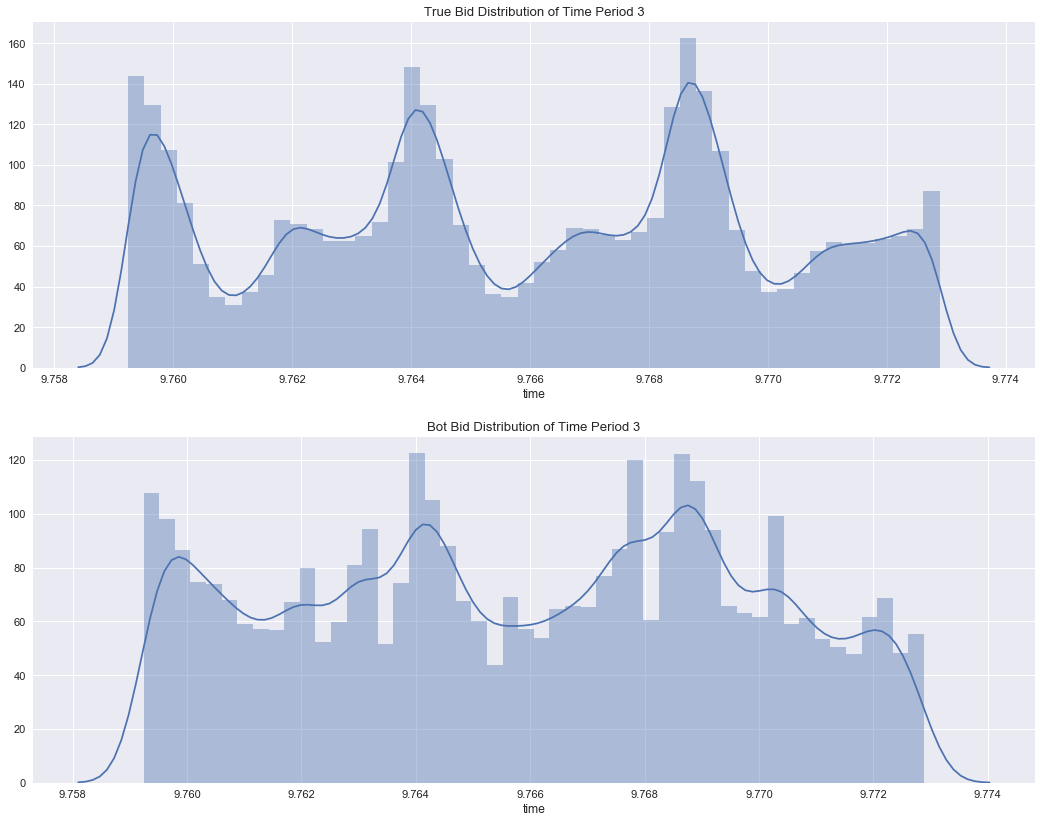

In [1180]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

true_buyer_time3=time_buyer_df[(time_buyer_df.time_period==3)&(time_buyer_df.outcome==0)]['time']
bot_buyer_time3=time_buyer_df[(time_buyer_df.time_period==3)&(time_buyer_df.outcome==1)]['time']

plt.figure(figsize=(16,14))


plt.subplot(211)
plt.title("True Bid Distribution of Time Period 3")
sns.distplot(true_buyer_time3)


plt.subplot(212)
plt.title("Bot Bid Distribution of Time Period 3")
sns.distplot(bot_buyer_time3)


plt.show()

In [1288]:
print "timespan of true buyers within all 3 cycles"
print max(true_buyer_time1) - min(true_buyer_time1)
print max(true_buyer_time2) - min(true_buyer_time2)
print max(true_buyer_time3) - min(true_buyer_time3)
print "start of buying cycle 1: true vs bot bidders"
print min(true_buyer_time1)
print min(bot_buyer_time1)

timespan of true buyers within all 3 cycles
0.0136420526316
0.0136420526316
0.0136420526316
start of buying cycle 1: true vs bot bidders
9.63191684211
9.63191684211


#### Observation
The reoccurring number representing the span from the beginning to the end of each auction is 0.0136420526316. The time distribution for each period has 3 noticeable full cycles of sharp peak to valley to rise. I will be declaring each cycle to mean the cycle of a day. To make sense of early bidding patterns, which I suspect bots at excelling at, I will be comparing how many true buyers vs bots made bids within the first 15 mins of the competition.

# Part II: Feature Generation 1
#### *What does it mean to be human... bidding-wise? *

## FG1: Bid Within 15/30/60 Minutes of Auction Opening
Bot users may excel at bidding as soon as an auction house opens for one of its cycles. To investigate whether this is the case, I will be converting the time scale into minutes based on my estimation of each cycle consisting of 3 days and determine what percentage of true vs bot users make bids within 15, 30, and 60 minutes.

In [1183]:
#converting time into minutes.
qrhour=(max(true_buyer_time1) - min(true_buyer_time1))/(72 * 4)

within15mins=min(true_buyer_time1)+qrhour

true_c1_within15mins = time_buyer_df[(time_buyer_df.time_period==1)&\
                                     (time_buyer_df.outcome==0)&\
                                     (time_buyer_df.time<=within15mins)]

bot_c1_within15mins = time_buyer_df[(time_buyer_df.time_period==1)&\
                                     (time_buyer_df.outcome==1)&\
                                     (time_buyer_df.time<=within15mins)]

#####

halfhour=(max(true_buyer_time1) - min(true_buyer_time1))/(72 * 2)

within30mins=min(true_buyer_time1)+halfhour

true_c1_within30mins = time_buyer_df[(time_buyer_df.time_period==1)&\
                                     (time_buyer_df.outcome==0)&\
                                     (time_buyer_df.time<=within30mins)]

bot_c1_within30mins = time_buyer_df[(time_buyer_df.time_period==1)&\
                                     (time_buyer_df.outcome==1)&\
                                     (time_buyer_df.time<=within30mins)]

####

hour=(max(true_buyer_time1) - min(true_buyer_time1))/(72)

within60mins=min(true_buyer_time1)+hour

true_c1_within60mins = time_buyer_df[(time_buyer_df.time_period==1)&\
                                     (time_buyer_df.outcome==0)&\
                                     (time_buyer_df.time<=within60mins)]

bot_c1_within60mins = time_buyer_df[(time_buyer_df.time_period==1)&\
                                     (time_buyer_df.outcome==1)&\
                                     (time_buyer_df.time<=within60mins)]

In [1184]:
print "number of unique true bidders within auction period 1"
print len(time_buyer_df[(time_buyer_df.time_period==1)&\
                                     (time_buyer_df.outcome==0)]['bidder_id'].value_counts())

print "\nnumber of unique bot bidders within auction period 1"
print len(time_buyer_df[(time_buyer_df.time_period==1)&\
                                     (time_buyer_df.outcome==1)]['bidder_id'].value_counts())

print "\npercent of unique true bidders within 15 mins"
print (100.0*len(true_c1_within15mins['bidder_id'].value_counts()))/(len(time_buyer_df[(time_buyer_df.time_period==1)&\
                                     (time_buyer_df.outcome==0)]['bidder_id'].value_counts()))

print "\npercent of unique bot bidders within 15 mins"
print (100.0*len(bot_c1_within15mins['bidder_id'].value_counts()))/(len(time_buyer_df[(time_buyer_df.time_period==1)&\
                                     (time_buyer_df.outcome==1)]['bidder_id'].value_counts()))

print "\npercent of unique true bidders within 30 mins"
print (100.0*len(true_c1_within30mins['bidder_id'].value_counts()))/len(time_buyer_df[(time_buyer_df.time_period==1)&\
                                     (time_buyer_df.outcome==0)]['bidder_id'].value_counts())

print "\npercent of unique bot bidders within 30 mins"
print 100.0*len(bot_c1_within30mins['bidder_id'].value_counts())/len(time_buyer_df[(time_buyer_df.time_period==1)&\
                                     (time_buyer_df.outcome==1)]['bidder_id'].value_counts())

print "\npercent of unique true bidders within 60 mins"
print (100.0*len(true_c1_within60mins['bidder_id'].value_counts()))/len(time_buyer_df[(time_buyer_df.time_period==1)&\
                                     (time_buyer_df.outcome==0)]['bidder_id'].value_counts())

print "\npercent of unique bot bidders within 60 mins"
print 100.0*len(bot_c1_within60mins['bidder_id'].value_counts())/len(time_buyer_df[(time_buyer_df.time_period==1)&\
                                     (time_buyer_df.outcome==1)]['bidder_id'].value_counts())

number of unique true bidders within auction period 1
891

number of unique bot bidders within auction period 1
41

percent of unique true bidders within 15 mins
25.2525252525

percent of unique bot bidders within 15 mins
65.8536585366

percent of unique true bidders within 30 mins
32.7721661055

percent of unique bot bidders within 30 mins
70.7317073171

percent of unique true bidders within 60 mins
39.8428731762

percent of unique bot bidders within 60 mins
78.0487804878


In [1185]:
# split bids into 3 cycles now and then concatenate them after
bids_c1 = bids[bids.time_period==1]
bids_c1['within_15_mins'] = bids_c1['time'].map(lambda x: 1 if x<=within15mins else 0)
bids_c1['within_30_mins'] = bids_c1['time'].map(lambda x: 1 if x<=within30mins else 0)

In [1186]:
# for cycle 2
qrhour2=(max(true_buyer_time2) - min(true_buyer_time2))/(72 * 4)

within15mins2=min(true_buyer_time2)+qrhour2


halfhour2=(max(true_buyer_time2) - min(true_buyer_time2))/(72 * 2)

within30mins2=min(true_buyer_time2)+halfhour2

In [1187]:
# split bids into 3 cycles now and then concatenate them after
bids_c2 = bids[bids.time_period==2]
bids_c2['within_15_mins'] = bids_c2['time'].map(lambda x: 1 if x<=within15mins2 else 0)
bids_c2['within_30_mins'] = bids_c2['time'].map(lambda x: 1 if x<=within30mins2 else 0)

In [1188]:
qrhour3=(max(true_buyer_time3) - min(true_buyer_time3))/(72 * 4)

within15mins3=min(true_buyer_time3)+qrhour3


halfhour3=(max(true_buyer_time3) - min(true_buyer_time3))/(72 * 2)

within30mins3=min(true_buyer_time3)+halfhour3

In [1189]:
# split bids into 3 cycles now and then concatenate them after
bids_c3 = bids[bids.time_period==3]
bids_c3['within_15_mins'] = bids_c3['time'].map(lambda x: 1 if x<=within15mins3 else 0)
bids_c3['within_30_mins'] = bids_c3['time'].map(lambda x: 1 if x<=within30mins3 else 0)

In [1190]:
# all three cycles concatenated into one
bids_within_mins = pd.concat([bids_c1,bids_c2,bids_c3])

In [1191]:
# within 15 minutes total then percent
total_15m_bids_by_id = bids_within_mins[bids_within_mins.within_15_mins==1].groupby(["bidder_id"])["bid_id"].count().sort_values(ascending=False).to_frame().reset_index()
total_15m_bids_by_id.columns=["bidder_id","total_bids_within_15_mins_by_id"]

bids_within_mins = pd.merge(bids_within_mins,total_15m_bids_by_id,on=['bidder_id','bidder_id'],how='left')
bids_within_mins['total_bids_within_15_mins_by_id']=bids_within_mins['total_bids_within_15_mins_by_id'].fillna(0)

In [1192]:
#percent 15 mins
bids_within_mins["perc_bids_within_15_mins_by_id"]=bids_within_mins['total_bids_within_15_mins_by_id']/bids_within_mins['total_bids_by_id']

In [1193]:
# within 30 minutes total then percent
total_30m_bids_by_id = bids_within_mins[bids_within_mins.within_30_mins==1].groupby(["bidder_id"])["bid_id"].count().sort_values(ascending=False).to_frame().reset_index()
total_30m_bids_by_id.columns=["bidder_id","total_bids_within_30_mins_by_id"]

bids_within_mins = pd.merge(bids_within_mins,total_30m_bids_by_id,on=['bidder_id','bidder_id'],how='left')
bids_within_mins['total_bids_within_30_mins_by_id']=bids_within_mins['total_bids_within_30_mins_by_id'].fillna(0)

In [1194]:
#percent 30 mins
bids_within_mins["perc_bids_within_30_mins_by_id"]=bids_within_mins['total_bids_within_30_mins_by_id']/bids_within_mins['total_bids_by_id']

In [1195]:
bids_within_mins2=pd.merge(bids_within_mins,train,on=["bidder_id","bidder_id"],how="left")
bids_within_mins2.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,total_bids_by_id,time_period,within_15_mins,within_30_mins,total_bids_within_15_mins_by_id,perc_bids_within_15_mins_by_id,total_bids_within_30_mins_by_id,perc_bids_within_30_mins_by_id,payment_account,address,outcome
0,2351187,76218e14c379c12d599dae9e1c00b61a3i5b2,6hpvy,sporting goods,phone1161,9.631917,cz,121.169.96.51,f33fl83l4vrg6is,46707,1,1,1,427.0,0.009142,616.0,0.013189,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,0.0
1,2351188,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,64uay,sporting goods,phone0,9.631917,ke,17.120.130.121,vasstdc27m7nks3,515033,1,1,1,3548.0,0.006889,7125.0,0.013834,a3d2de7675556553a5f08e4c88d2c228sezhf,a3d2de7675556553a5f08e4c88d2c228nfhse,0.0
2,2351189,3350dc181383b032a6542a61c67713f9lmevm,b3crj,mobile,phone4,9.631917,tz,38.153.26.26,vasstdc27m7nks3,134018,1,1,1,402.0,0.003000,1239.0,0.009245,NaN,NaN,NaN
3,2351190,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,fagyq,sporting goods,phone1,9.631917,in,161.192.187.34,3skc4v2r07bneta,515033,1,1,1,3548.0,0.006889,7125.0,0.013834,a3d2de7675556553a5f08e4c88d2c228sezhf,a3d2de7675556553a5f08e4c88d2c228nfhse,0.0
4,2351191,626159dd6f2228ede002d9f9340f75b7puk8d,c2jhm,jewelry,phone119,9.631917,ru,114.173.200.238,5yyqy69xt3y8xdg,87547,1,1,1,388.0,0.004432,852.0,0.009732,NaN,NaN,NaN


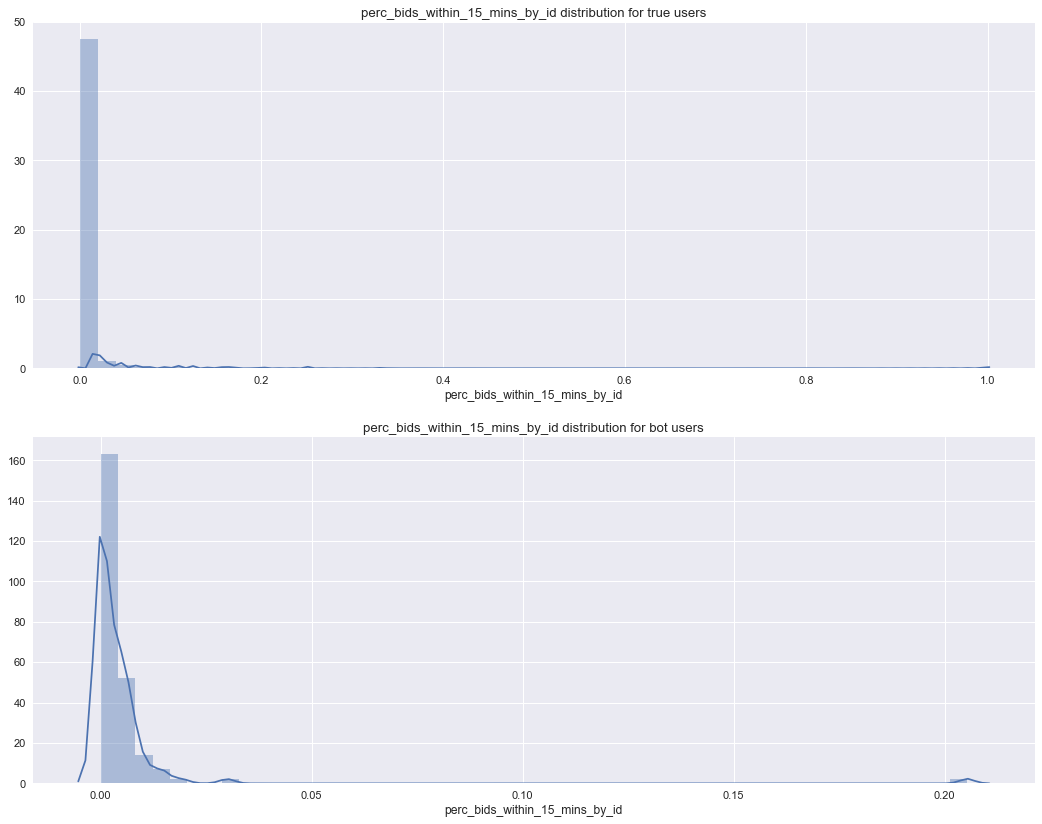

In [1196]:
plt.figure(figsize=(16,14))


plt.subplot(211)
plt.title("perc_bids_within_15_mins_by_id distribution for true users")
sns.distplot(bids_within_mins2[bids_within_mins2.outcome==0].groupby('bidder_id')['perc_bids_within_15_mins_by_id'].mean())


plt.subplot(212)
plt.title("perc_bids_within_15_mins_by_id distribution for bot users")
sns.distplot(bids_within_mins2[bids_within_mins2.outcome==1].groupby('bidder_id')['perc_bids_within_15_mins_by_id'].mean())


plt.show()

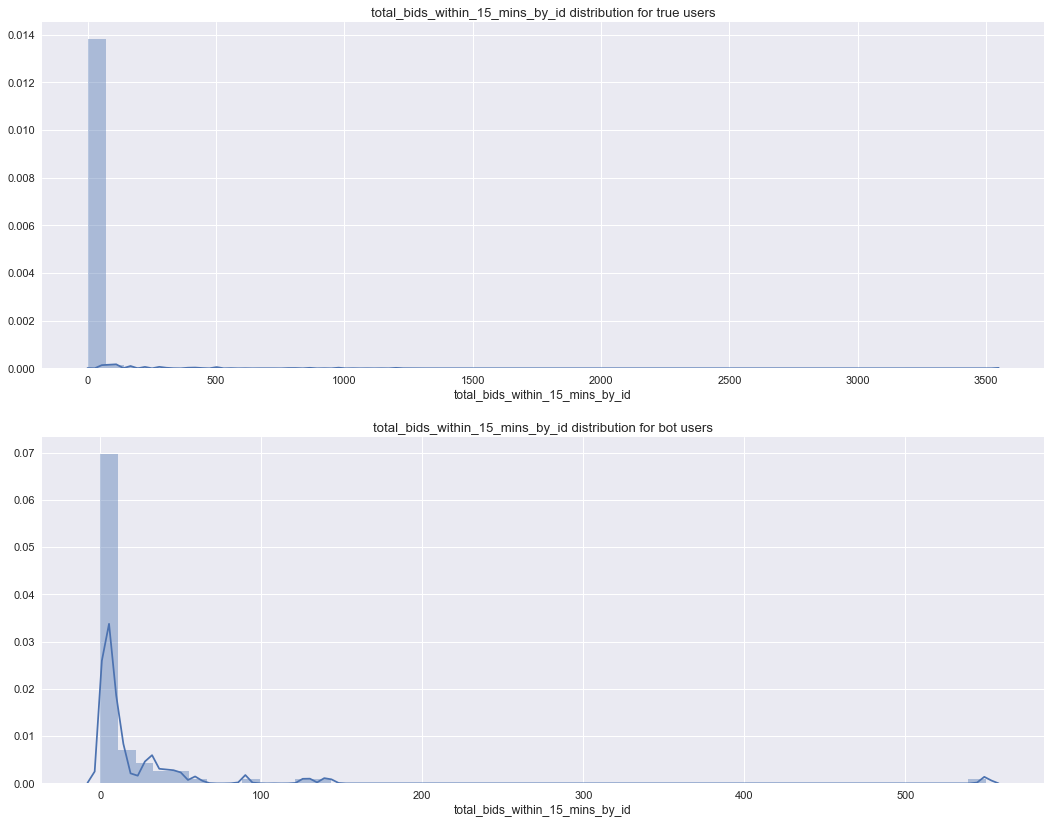

In [1197]:
plt.figure(figsize=(16,14))


plt.subplot(211)
plt.title("total_bids_within_15_mins_by_id distribution for true users")
sns.distplot(bids_within_mins2[bids_within_mins2.outcome==0].groupby('bidder_id')['total_bids_within_15_mins_by_id'].mean())


plt.subplot(212)
plt.title("total_bids_within_15_mins_by_id distribution for bot users")
sns.distplot(bids_within_mins2[bids_within_mins2.outcome==1].groupby('bidder_id')['total_bids_within_15_mins_by_id'].mean())


plt.show()

In [1198]:
stats.ttest_ind(bids_within_mins2[bids_within_mins2.outcome==0].groupby('bidder_id')['perc_bids_within_15_mins_by_id'].mean(),bids_within_mins2[bids_within_mins2.outcome==1].groupby('bidder_id')['perc_bids_within_15_mins_by_id'].mean(), equal_var = False)

Ttest_indResult(statistic=0.87141176290937072, pvalue=0.3846893447727725)

#### Observation
With a high p-value returned from the t-test, there does not seem to be a significant difference in the means of true vs human bidder populations.

## FG1: Bidding Entropy 
Interestingly bot bids tend to not be clustered on the early side, whereas true users are. This feature may not be as insightful as initially thought out to be but will still be left in. It may also be insightful to see if individual user bidding trends are similar to their overall true/bot category, where true users have peaks of high activity whereas bot users have more evenly dispersed activity. Let's look at bids of top bidding true users vs bots within each cycle.

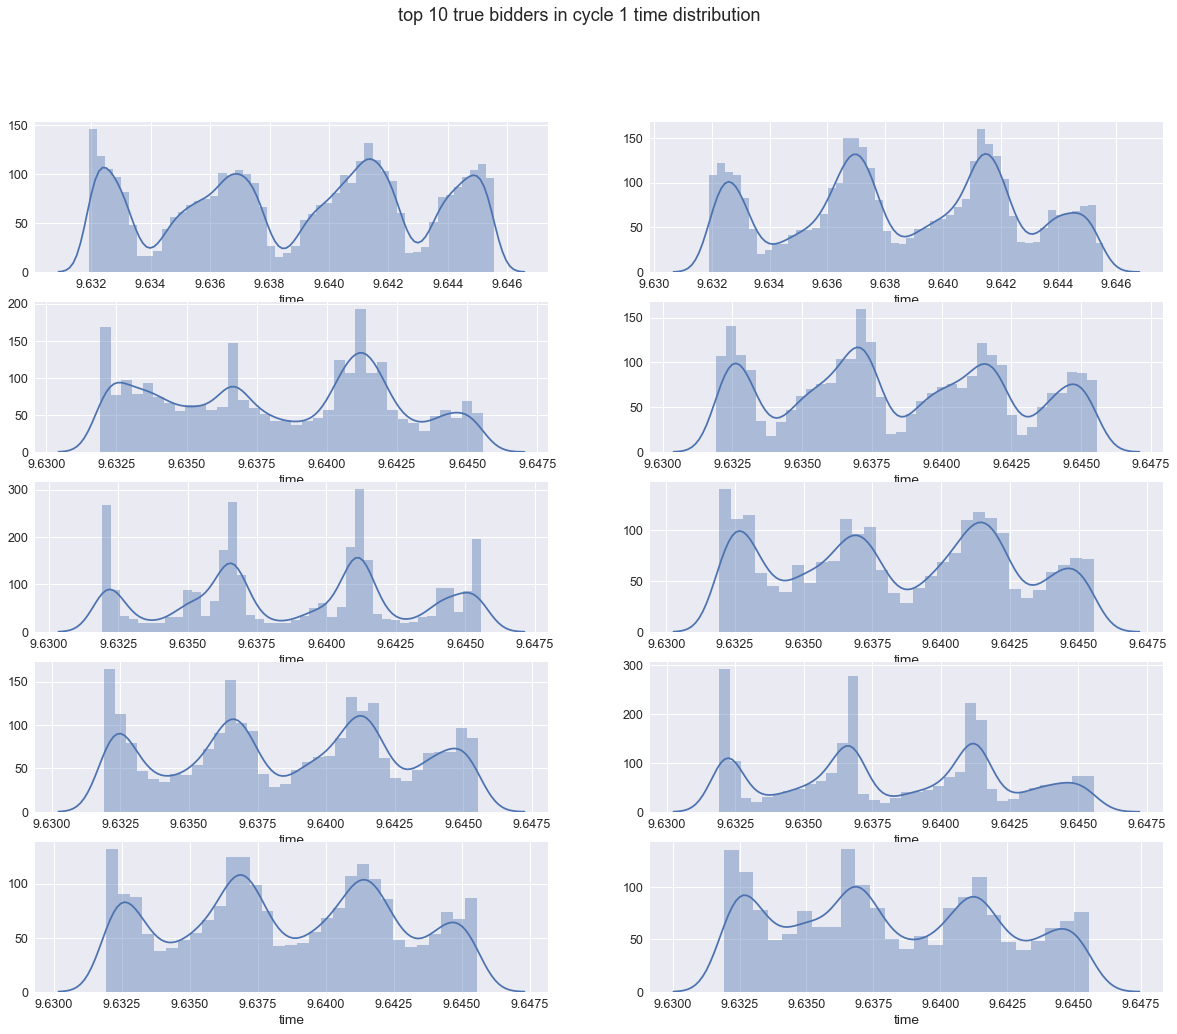

In [1264]:
top10true1=bids_within_mins2[(bids_within_mins2.outcome==0)&(bids_within_mins2.time_period==1)].groupby(['bidder_id'])['bid_id'].count().sort_values(ascending=False).head(10).index.tolist()
top10bot1=bids_within_mins2[(bids_within_mins2.outcome==1)&(bids_within_mins2.time_period==1)].groupby(['bidder_id'])['bid_id'].count().sort_values(ascending=False).head(10).index.tolist()


plt.figure(figsize=(18,16))
plt.suptitle("top 10 true bidders in cycle 1 time distribution")
for i in top10true1:
    plt.subplot(5,2,top10true1.index(i)+1)
    sns.distplot(bids_within_mins2[(bids_within_mins2.bidder_id==i)&(bids_within_mins2.time_period==1)]['time'])

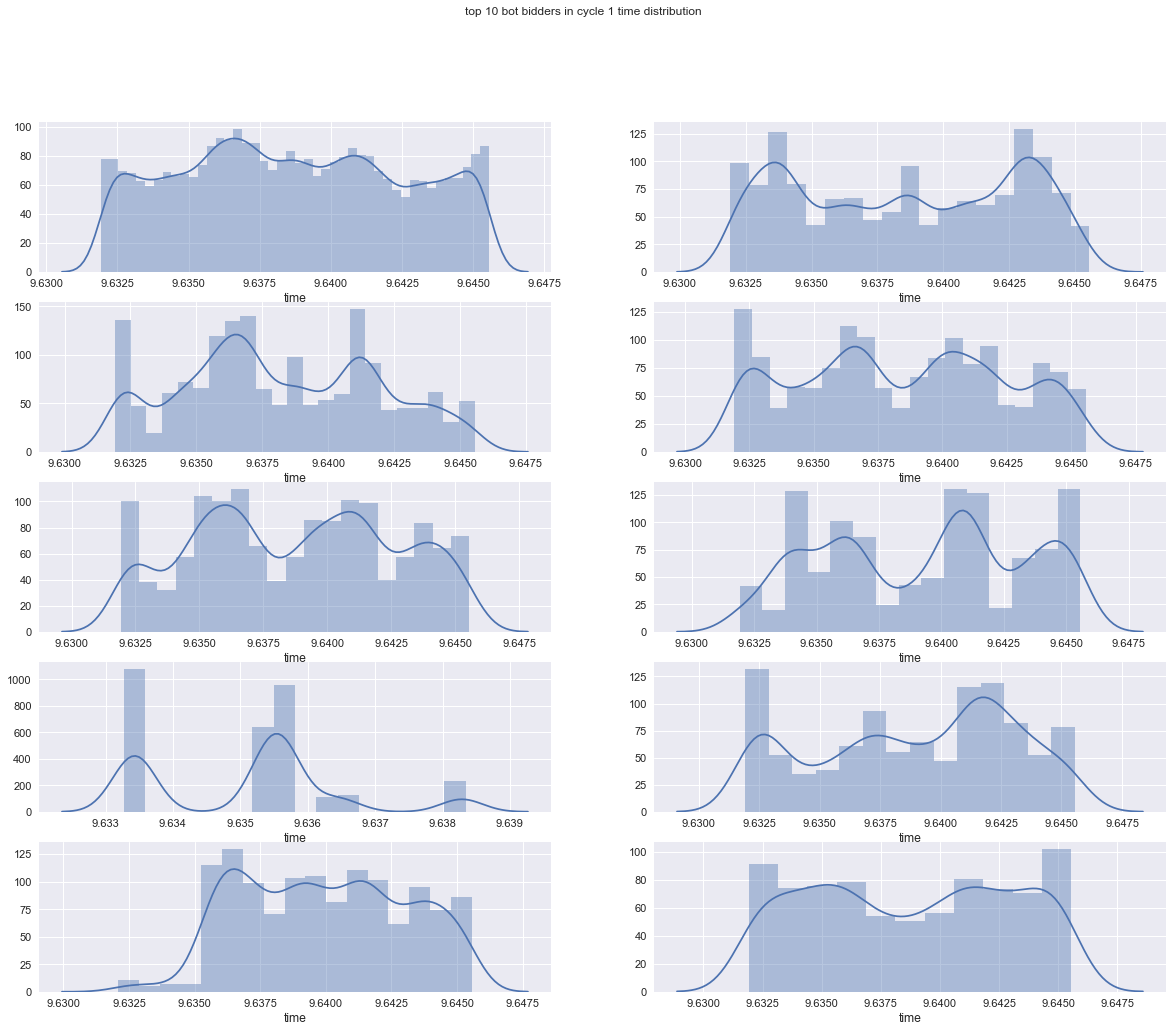

In [1200]:
plt.figure(figsize=(18,16))
plt.suptitle("top 10 bot bidders in cycle 1 time distribution")
for i in top10bot1:
    plt.subplot(5,2,top10bot1.index(i)+1)
    sns.distplot(bids_within_mins2[(bids_within_mins2.bidder_id==i)&(bids_within_mins2.time_period==1)]['time'])

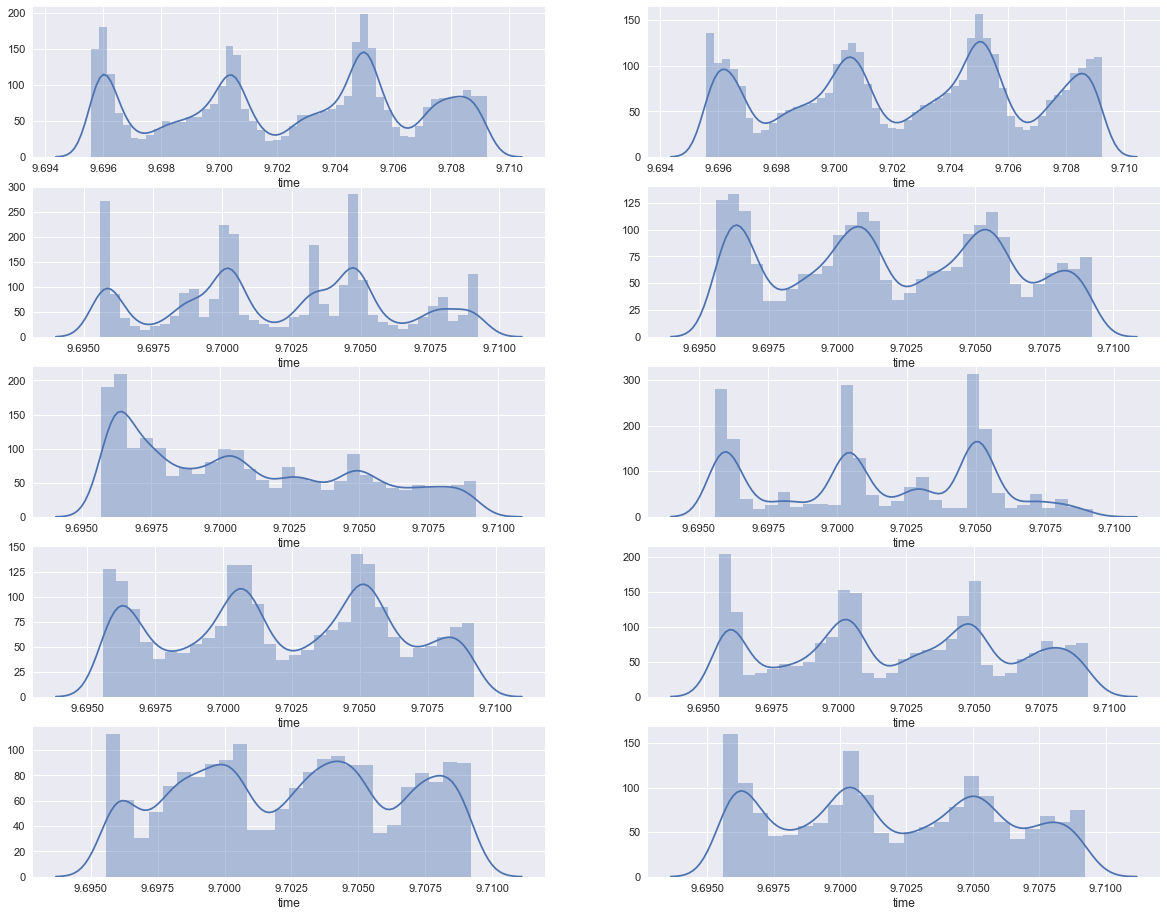

In [1201]:
top10true2=bids_within_mins2[(bids_within_mins2.outcome==0)&(bids_within_mins2.time_period==2)].groupby(['bidder_id'])['bid_id'].count().sort_values(ascending=False).head(10).index.tolist()
top10bot2=bids_within_mins2[(bids_within_mins2.outcome==1)&(bids_within_mins2.time_period==2)].groupby(['bidder_id'])['bid_id'].count().sort_values(ascending=False).head(10).index.tolist()


plt.figure(figsize=(18,16))
plt.suptitle("top 10 true bidders in cycle 2 time distribution")
for i in top10true2:
    plt.subplot(5,2,top10true2.index(i)+1)
    sns.distplot(bids_within_mins2[(bids_within_mins2.bidder_id==i)&(bids_within_mins2.time_period==2)]['time'])
plt.show()

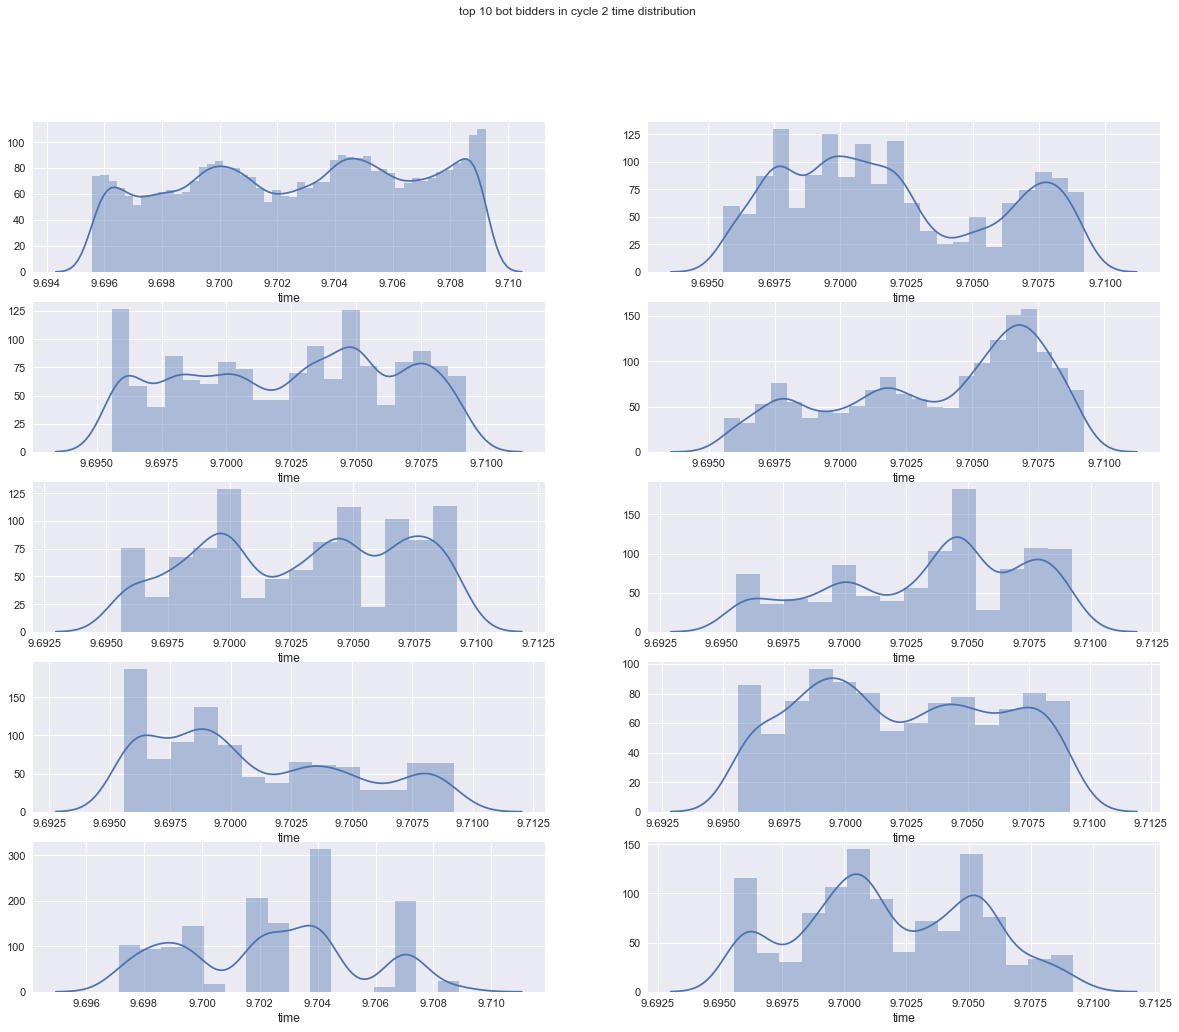

In [1202]:
plt.figure(figsize=(18,16))
plt.suptitle("top 10 bot bidders in cycle 2 time distribution")
for i in top10bot2:
    plt.subplot(5,2,top10bot2.index(i)+1)
    sns.distplot(bids_within_mins2[(bids_within_mins2.bidder_id==i)&(bids_within_mins2.time_period==2)]['time'])

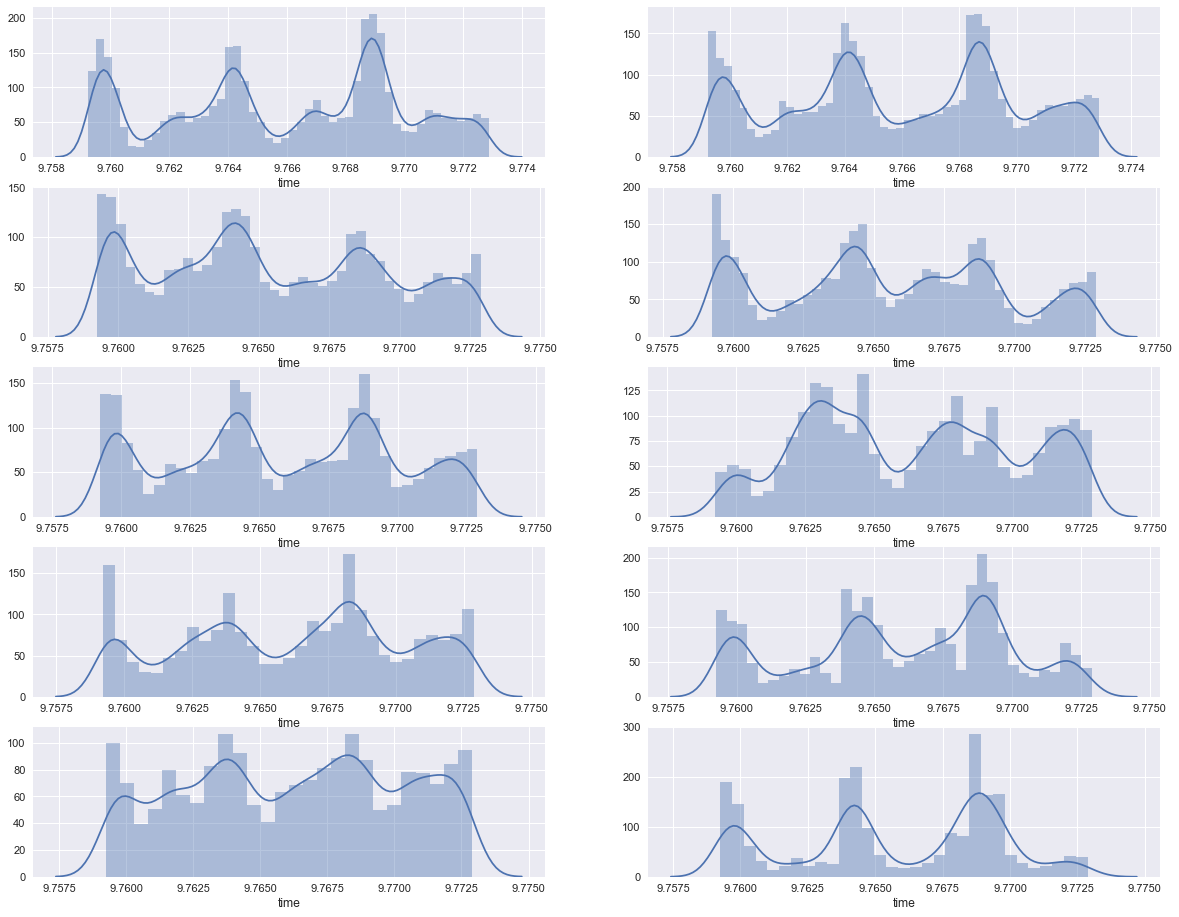

In [1203]:
top10true3=bids_within_mins2[(bids_within_mins2.outcome==0)&(bids_within_mins2.time_period==3)].groupby(['bidder_id'])['bid_id'].count().sort_values(ascending=False).head(10).index.tolist()
top10bot3=bids_within_mins2[(bids_within_mins2.outcome==1)&(bids_within_mins2.time_period==3)].groupby(['bidder_id'])['bid_id'].count().sort_values(ascending=False).head(10).index.tolist()

plt.suptitle("top 10 true bidders in cycle 3 time distribution")
plt.figure(figsize=(18,16))
for i in top10true3:
    plt.subplot(5,2,top10true3.index(i)+1)
    sns.distplot(bids_within_mins2[(bids_within_mins2.bidder_id==i)&(bids_within_mins2.time_period==3)]['time'])
plt.show()

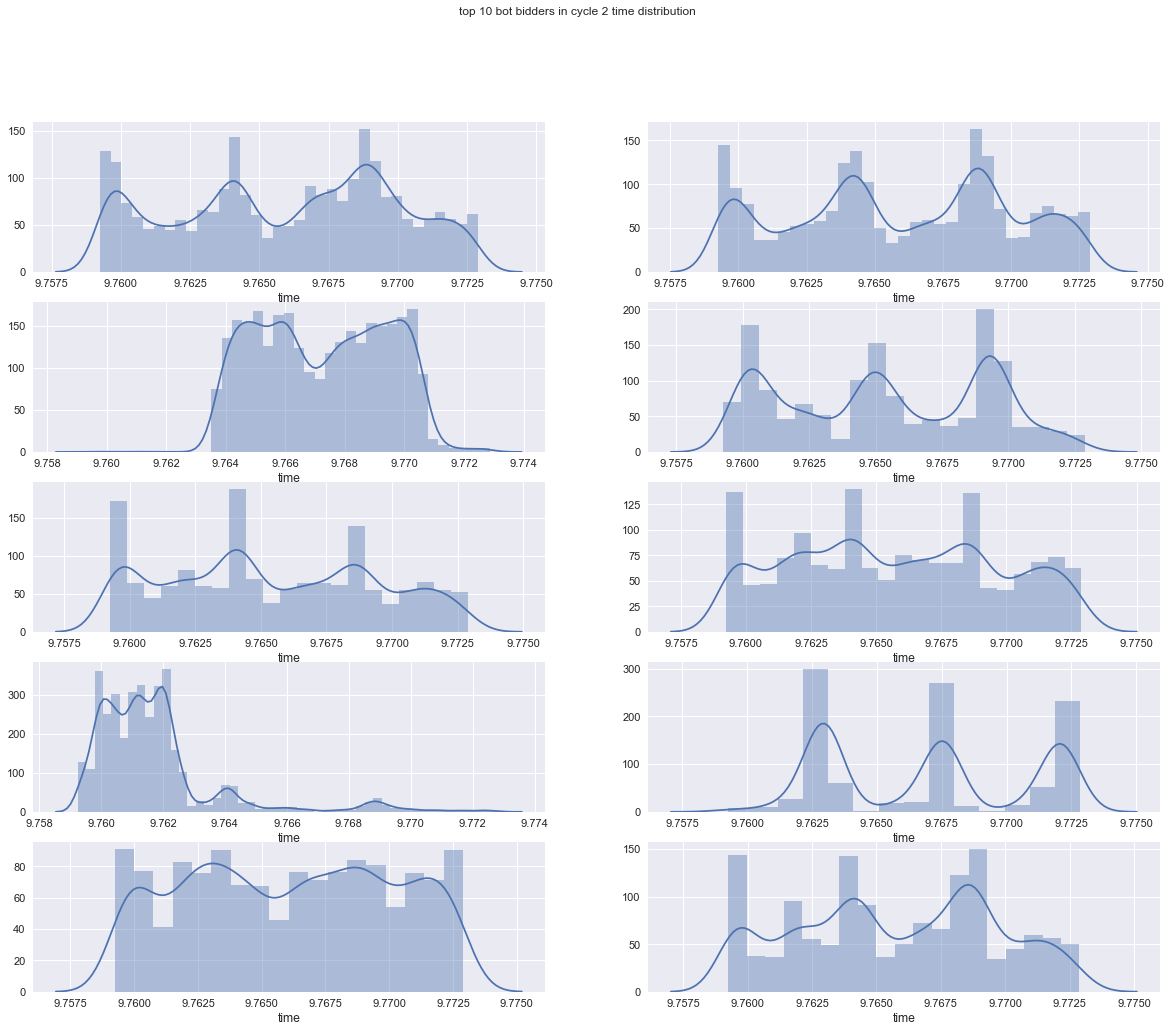

In [1204]:
plt.figure(figsize=(18,16))
plt.suptitle("top 10 bot bidders in cycle 2 time distribution")
for i in top10bot3:
    plt.subplot(5,2,top10bot3.index(i)+1)
    sns.distplot(bids_within_mins2[(bids_within_mins2.bidder_id==i)&(bids_within_mins2.time_period==3)]['time'])

#### Observation
Comparing the kde's between true users and bots, it is evident that true users tend to cluster their activity within a narrower timeframe (shown in the kde by large peaks and narrow valleys) rather than having their activity more widely dispersed as seen in the bot kde's (more of an even distribution). Even distributions have higher information entropy compared to clustered distributions. To see if entropy may be a good measure in discriminating bots from true users, the entropy scores for users in cycle 3 will be calculated. If it shows promise, entropy will also be calculated for the users in other cycles.



In [1209]:
import scipy.stats as stats

# first get evely spaced array from beginning and end of cycle 3
kde_array3 = np.linspace(min(bot_buyer_time3), max(bot_buyer_time3), 1000)
bot_id_3=bids_within_mins2[(bids_within_mins2.outcome==1)&(bids_within_mins2.time_period==3)].groupby(['bidder_id'])['bid_id'].count().sort_values(ascending=False).index.tolist()
entropy3b_list =[]

for bot in bot_id_3:
    try:
        # get times for each bot, get kde of those times, plug in evenly spaced array, calculate entropy
        time3b=(bids_within_mins2[(bids_within_mins2.bidder_id==bot)&(bids_within_mins2.time_period==3)]['time']).tolist()
        kde3b=stats.gaussian_kde(time3b)
        probs3b=kde3b(kde_array3)
        entropy3b_list.append(stats.entropy(probs3b))
    except:
        entropy3b_list.append(0)

In [1210]:
kde_array3t = np.linspace(min(true_buyer_time3), max(true_buyer_time3), 1000)
true_id_3=bids_within_mins2[(bids_within_mins2.outcome==0)&(bids_within_mins2.time_period==3)].groupby(['bidder_id'])['bid_id'].count().sort_values(ascending=False).index.tolist()
entropy3t_list =[]

for true in true_id_3:
    try:
        time3t=(bids_within_mins2[(bids_within_mins2.bidder_id==true)&(bids_within_mins2.time_period==3)]['time']).tolist()
        kde3t=stats.gaussian_kde(time3t)
        probs3t=kde3t(kde_array3t)
        entropy3t_list.append(stats.entropy(probs3t))
    except:
        entropy3t_list.append(0)

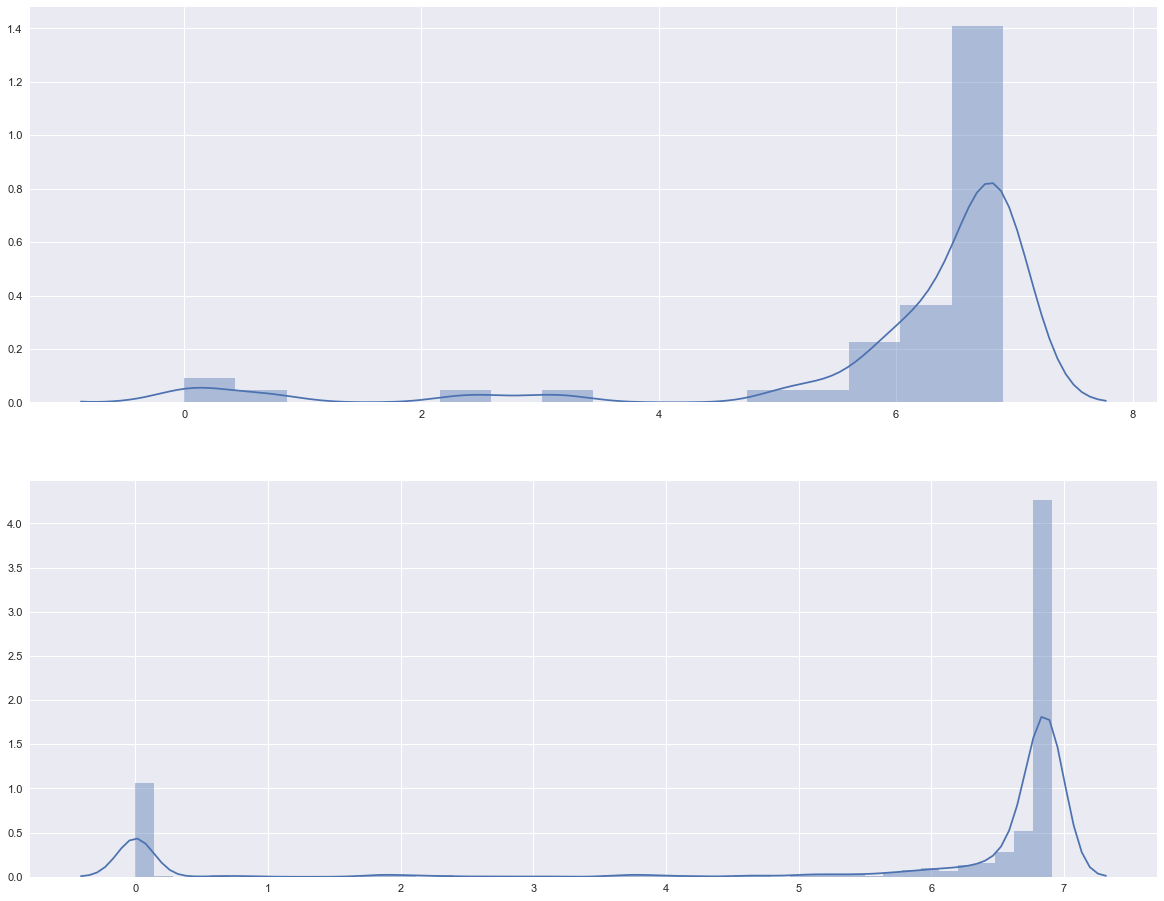

In [1211]:
plt.suptitle("true bidder entropy vs bot bidder entropy cycle 3")
plt.figure(figsize=(18,16))

plt.subplot(2,1,1)
sns.distplot(entropy3b_list)

plt.subplot(212)
sns.distplot(entropy3t_list)


In [1212]:
stats.ttest_ind(entropy3t_list,entropy3b_list, equal_var = False)

Ttest_indResult(statistic=-1.7909601670093709, pvalue=0.078001623374753692)

In [1213]:
# 5 bot users with a single purchase
bids_within_mins2[bids_within_mins2.outcome==1]['total_bids_by_id'].sort_values().head(10)

7295763     1
5069894     1
4718142     1
4517320     1
5285910     1
6757866     4
6080909     4
6852814     4
6851633     4
4973117    10
Name: total_bids_by_id, dtype: int64

#### Observation
For cycle 3, entropy looks to be a decent feature in determining between bot and true users. Bot users that make a single purchase or no purchases could contribute to having an entropy value of 0, but these users are anomalous to other bots which would be designed to purchase en masse or quickly. Instead of calculating per cycle entropy, it may be a good idea to look into bot vs true user entropy of the entire auction overall.

In [1214]:
#cycle1
kde_array_c1 = np.linspace(min(bids_within_mins2[bids_within_mins2.time_period==1]['time']), max(bids_within_mins2[bids_within_mins2.time_period==1]['time']), 1000)
c1_ids=bids_within_mins2[bids_within_mins2.time_period==1]['bidder_id'].value_counts().index.tolist()
entropy_c1_list =[]

for i in c1_ids:
    if c1_ids.index(i)%500 == 0:
           print "Reviewing %d of %d" % (c1_ids.index(i), len(c1_ids))
    try:
        time_c1=bids_within_mins2[(bids_within_mins2.bidder_id==i)&(bids_within_mins2.time_period==1)]['time'].tolist()
        kde_c1=stats.gaussian_kde(time_c1)
        probs_c1=kde_c1(kde_array_c1)
        entropy_c1_list.append(stats.entropy(probs_c1))
    except:
        entropy_c1_list.append(0)

Reviewing 0 of 3016
Reviewing 500 of 3016
Reviewing 1000 of 3016
Reviewing 1500 of 3016
Reviewing 2000 of 3016
Reviewing 2500 of 3016
Reviewing 3000 of 3016


In [1215]:
#cycle2
kde_array_c2 = np.linspace(min(bids_within_mins2[bids_within_mins2.time_period==2]['time']), max(bids_within_mins2[bids_within_mins2.time_period==2]['time']), 1000)
c2_ids=bids_within_mins2[bids_within_mins2.time_period==2]['bidder_id'].value_counts().index.tolist()
entropy_c2_list =[]

for i in c2_ids:
    if c2_ids.index(i)%250 == 0:
           print "Reviewing %d of %d" % (c2_ids.index(i), len(c2_ids))
    try:
        time_c2=bids_within_mins2[(bids_within_mins2.bidder_id==i)&(bids_within_mins2.time_period==2)]['time'].tolist()
        kde_c2=stats.gaussian_kde(time_c2)
        probs_c2=kde_c2(kde_array_c2)
        entropy_c2_list.append(stats.entropy(probs_c2))
    except:
        entropy_c2_list.append(0)

Reviewing 0 of 3014
Reviewing 250 of 3014
Reviewing 500 of 3014
Reviewing 750 of 3014
Reviewing 1000 of 3014
Reviewing 1250 of 3014
Reviewing 1500 of 3014
Reviewing 1750 of 3014
Reviewing 2000 of 3014
Reviewing 2250 of 3014
Reviewing 2500 of 3014
Reviewing 2750 of 3014
Reviewing 3000 of 3014


In [1216]:
#cycle3
kde_array_c3 = np.linspace(min(bids_within_mins2[bids_within_mins2.time_period==3]['time']), max(bids_within_mins2[bids_within_mins2.time_period==3]['time']), 1000)
c3_ids=bids_within_mins2[bids_within_mins2.time_period==3]['bidder_id'].value_counts().index.tolist()
entropy_c3_list =[]

for i in c3_ids:
    if c3_ids.index(i)%250 == 0:
           print "Reviewing %d of %d" % (c3_ids.index(i), len(c3_ids))
    try:
        time_c3=bids_within_mins2[(bids_within_mins2.bidder_id==i)&(bids_within_mins2.time_period==3)]['time'].tolist()
        kde_c3=stats.gaussian_kde(time_c3)
        probs_c3=kde_c3(kde_array_c3)
        entropy_c3_list.append(stats.entropy(probs_c3))
    except:
        entropy_c3_list.append(0)

Reviewing 0 of 2954
Reviewing 250 of 2954
Reviewing 500 of 2954
Reviewing 750 of 2954
Reviewing 1000 of 2954
Reviewing 1250 of 2954
Reviewing 1500 of 2954
Reviewing 1750 of 2954
Reviewing 2000 of 2954
Reviewing 2250 of 2954
Reviewing 2500 of 2954
Reviewing 2750 of 2954


In [1217]:
entropy1=pd.DataFrame({
    'bidder_id':c1_ids,
    'entropy': entropy_c1_list
})

entropy2=pd.DataFrame({
    'bidder_id':c2_ids,
    'entropy': entropy_c2_list
})

entropy3=pd.DataFrame({
    'bidder_id':c3_ids,
    'entropy': entropy_c3_list
})

entropy_df = pd.concat([entropy1,entropy2,entropy3]).groupby(['bidder_id'])['entropy'].mean().to_frame().sort_values(['entropy']).reset_index()
entropy_df['entropy']=entropy_df['entropy'].apply(lambda x: 0 if x<=0 else x)
bids_w_entropy=pd.merge(bids_within_mins2,entropy_df,on=['bidder_id','bidder_id'])

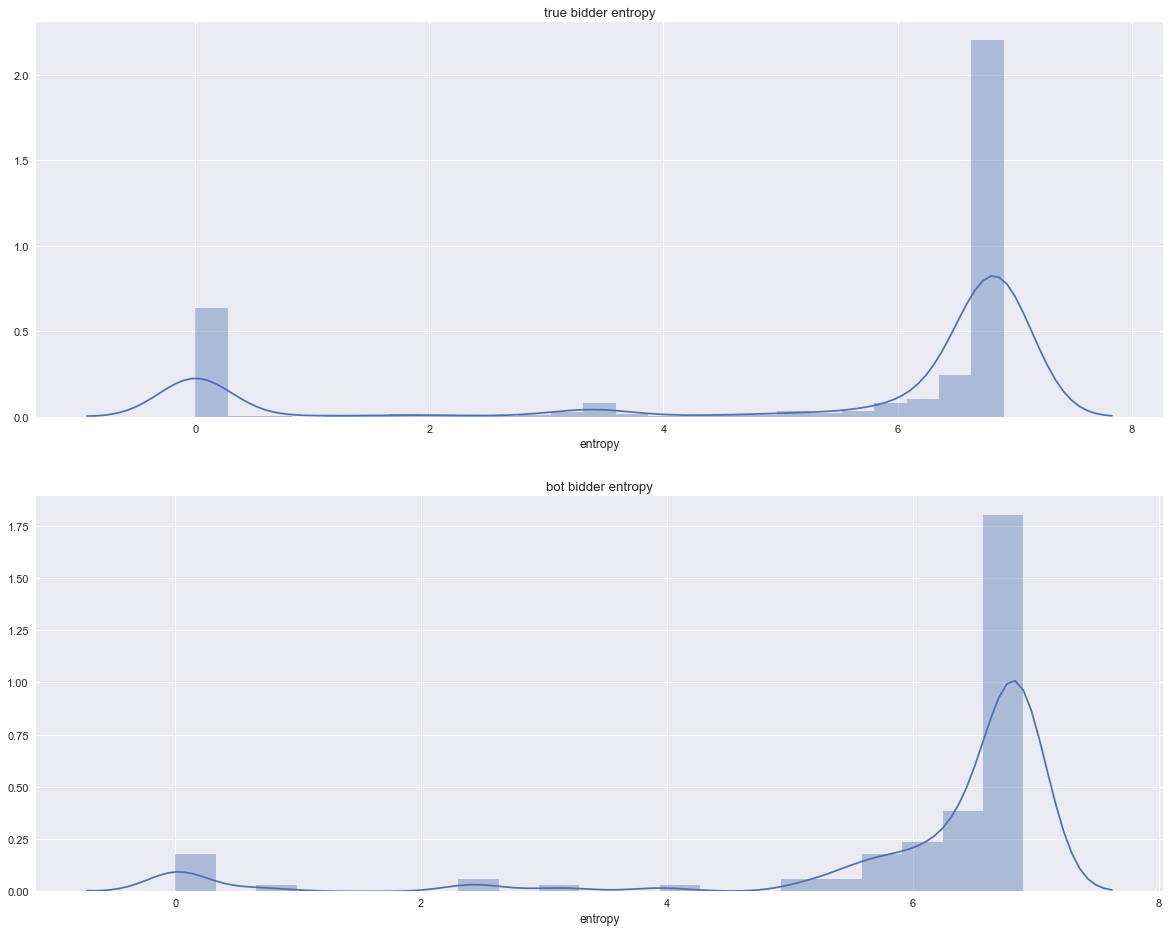

In [1218]:
plt.figure(figsize=(18,16))
plt.suptitle("true bidder entropy vs bot bidder entropy")
plt.subplot(2,1,1)
plt.title("true bidder entropy")
sns.distplot(bids_w_entropy[(bids_w_entropy.outcome==0)].groupby(['bidder_id'])['entropy'].mean())

plt.subplot(212)
plt.title("bot bidder entropy")
sns.distplot(bids_w_entropy[(bids_w_entropy.outcome==1)].groupby(['bidder_id'])['entropy'].mean())
plt.show()

In [1219]:
# t test for difference in population means
stats.ttest_ind(bids_w_entropy[(bids_w_entropy.outcome==1)].groupby(['bidder_id'])['entropy'].mean(),bids_w_entropy[(bids_w_entropy.outcome==0)].groupby(['bidder_id'])['entropy'].mean(),equal_var=False)

Ttest_indResult(statistic=3.8638584643762983, pvalue=0.00017676542379463315)

## FG1: Average Number of Unique IP Addresses, URL's, Devices, Countries, and Auctions Within Each Cycle
Calculating the average counts of unique categories per user per cycle is an easy way to introduce more features into the model. Even if these features do not end up being extremely useful, they can be discarded later.


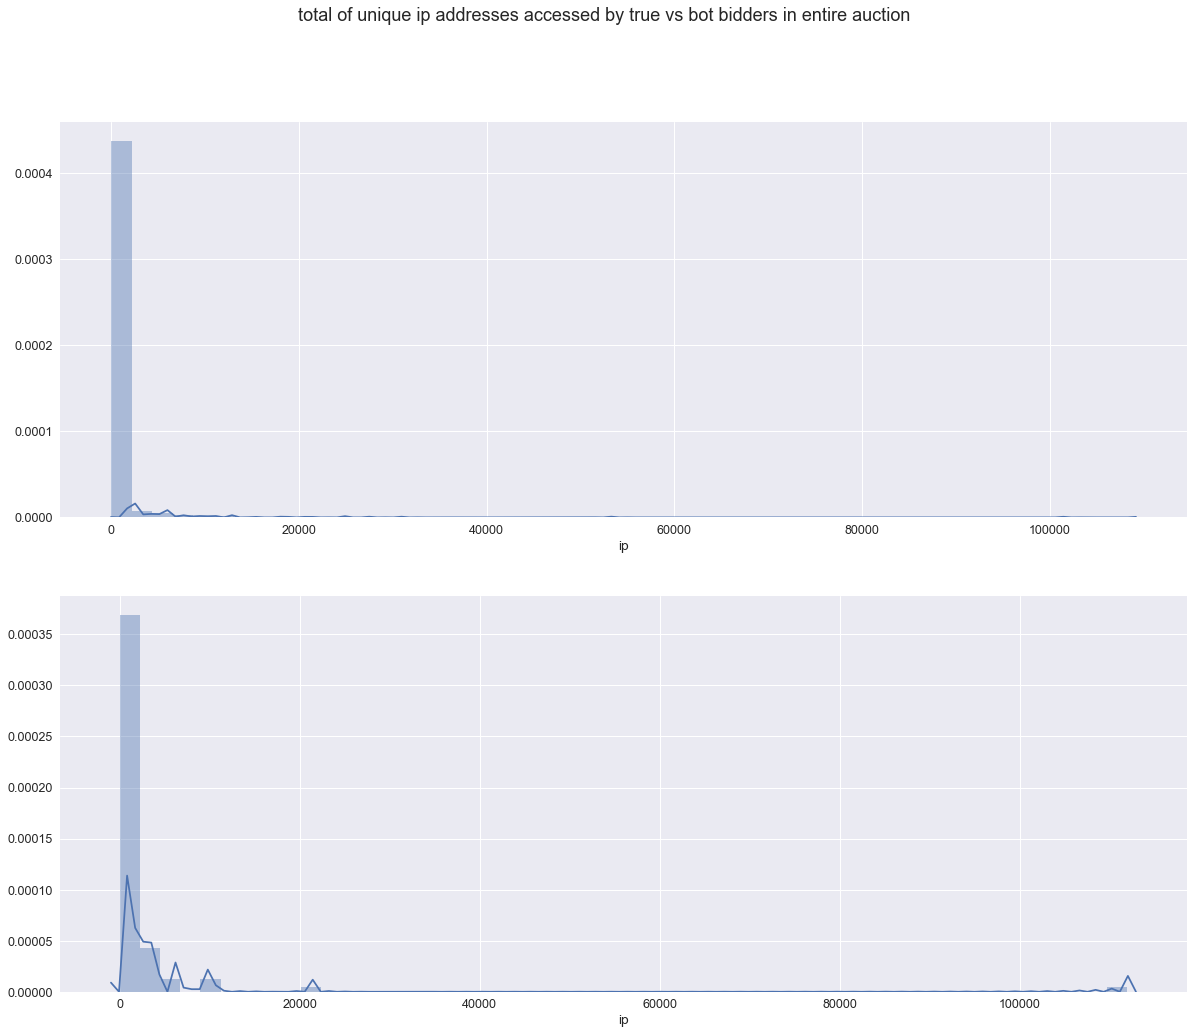

In [1220]:
sns.set(font_scale=1.25)
plt.figure(figsize=(18,16))
plt.subplot(211)
plt.suptitle("total of unique ip addresses accessed by true vs bot bidders in entire auction")
sns.distplot(bids_w_entropy[bids_w_entropy.outcome==0].groupby(['bidder_id'])['ip'].nunique())
plt.subplot(212)
sns.distplot(bids_w_entropy[bids_w_entropy.outcome==1].groupby(['bidder_id'])['ip'].nunique())

In [1221]:
# t test for difference in population means
stats.ttest_ind(bids_w_entropy[bids_w_entropy.outcome==0].groupby(['bidder_id'])['ip'].nunique(),bids_w_entropy[bids_w_entropy.outcome==1].groupby(['bidder_id'])['ip'].nunique(),equal_var=False)

Ttest_indResult(statistic=-1.6208974202772375, pvalue=0.1080820118364271)

In [1222]:
#calculate average number of unique ips used per cycle per user
mean_ip_df=bids_w_entropy.groupby(['bidder_id','time_period'])['ip'].nunique().sort_values(ascending=False).to_frame().reset_index().groupby(['bidder_id'])['ip'].mean().to_frame().reset_index().sort_values(['ip'],ascending=False)
mean_ip_df.columns=['bidder_id','mean_ip_count_per_cycle']
bids_w_ip_count=pd.merge(bids_w_entropy,mean_ip_df,on=['bidder_id','bidder_id'],how='left')

Ttest_indResult(statistic=-2.0172230058840048, pvalue=0.04624937148521379)


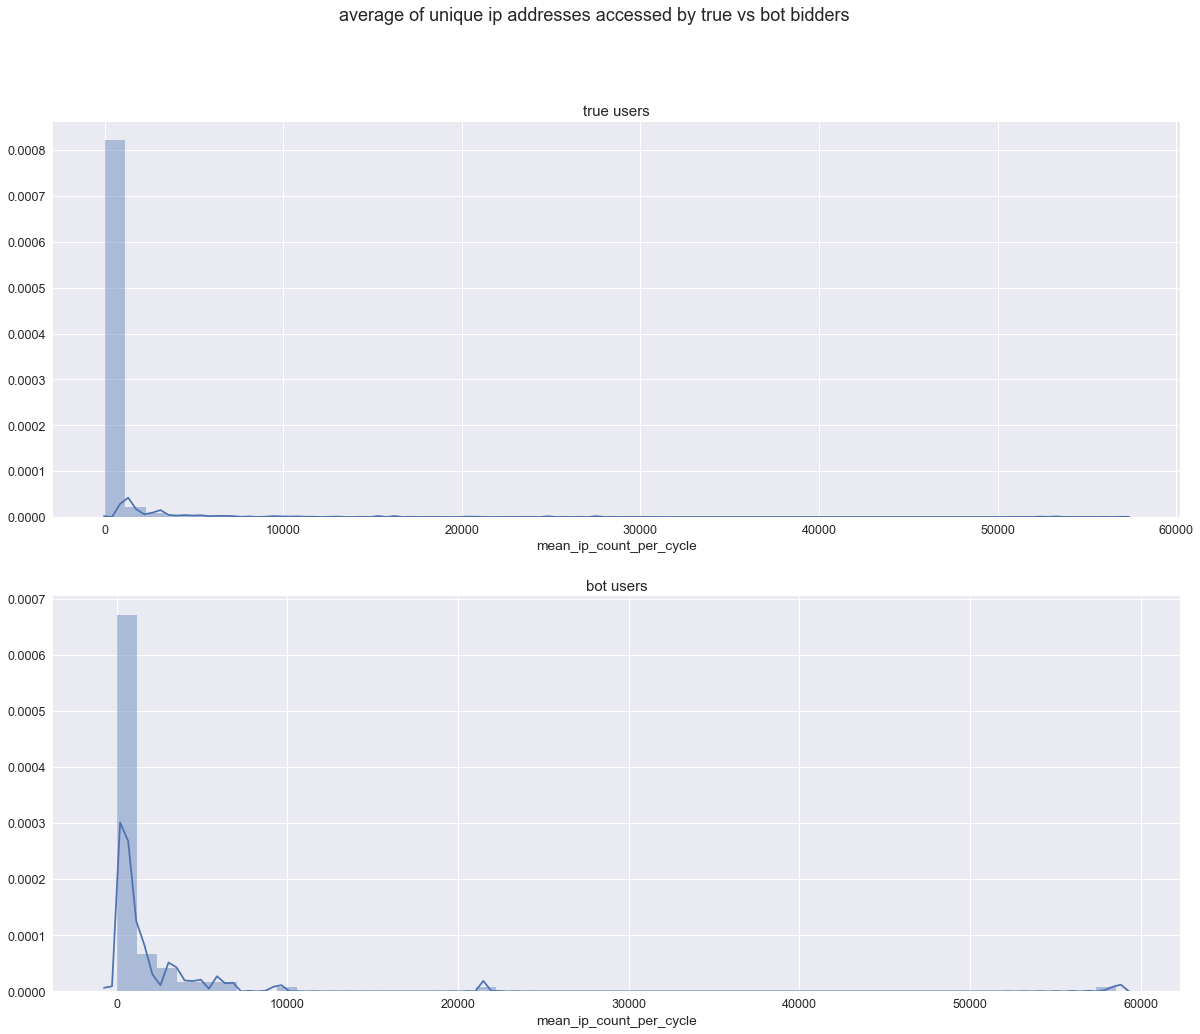

In [1223]:
sns.set(font_scale=1.25)
plt.figure(figsize=(18,16))

plt.subplot(211)
plt.suptitle("average of unique ip addresses accessed by true vs bot bidders ")

plt.title("true users")
sns.distplot(bids_w_ip_count[bids_w_ip_count.outcome==0].groupby(['bidder_id'])['mean_ip_count_per_cycle'].mean())

plt.subplot(212)
plt.title("bot users")
sns.distplot(bids_w_ip_count[bids_w_ip_count.outcome==1].groupby(['bidder_id'])['mean_ip_count_per_cycle'].mean())

print stats.ttest_ind(bids_w_ip_count[bids_w_ip_count.outcome==0].groupby(['bidder_id'])['mean_ip_count_per_cycle'].mean(),bids_w_ip_count[bids_w_ip_count.outcome==1].groupby(['bidder_id'])['mean_ip_count_per_cycle'].mean(),equal_var=False)

In [1224]:
#calculate average number of unique url used per cycle per user
mean_url_df=bids_w_entropy.groupby(['bidder_id','time_period'])['url'].nunique().sort_values(ascending=False).to_frame().reset_index().groupby(['bidder_id'])['url'].mean().to_frame().reset_index().sort_values(['url'],ascending=False)
mean_url_df.columns=['bidder_id','mean_url_count_per_cycle']
bids_w_url_count=pd.merge(bids_w_ip_count,mean_url_df,on=['bidder_id','bidder_id'],how='left')

Ttest_indResult(statistic=-2.2630166204682918, pvalue=0.025084906823657573)


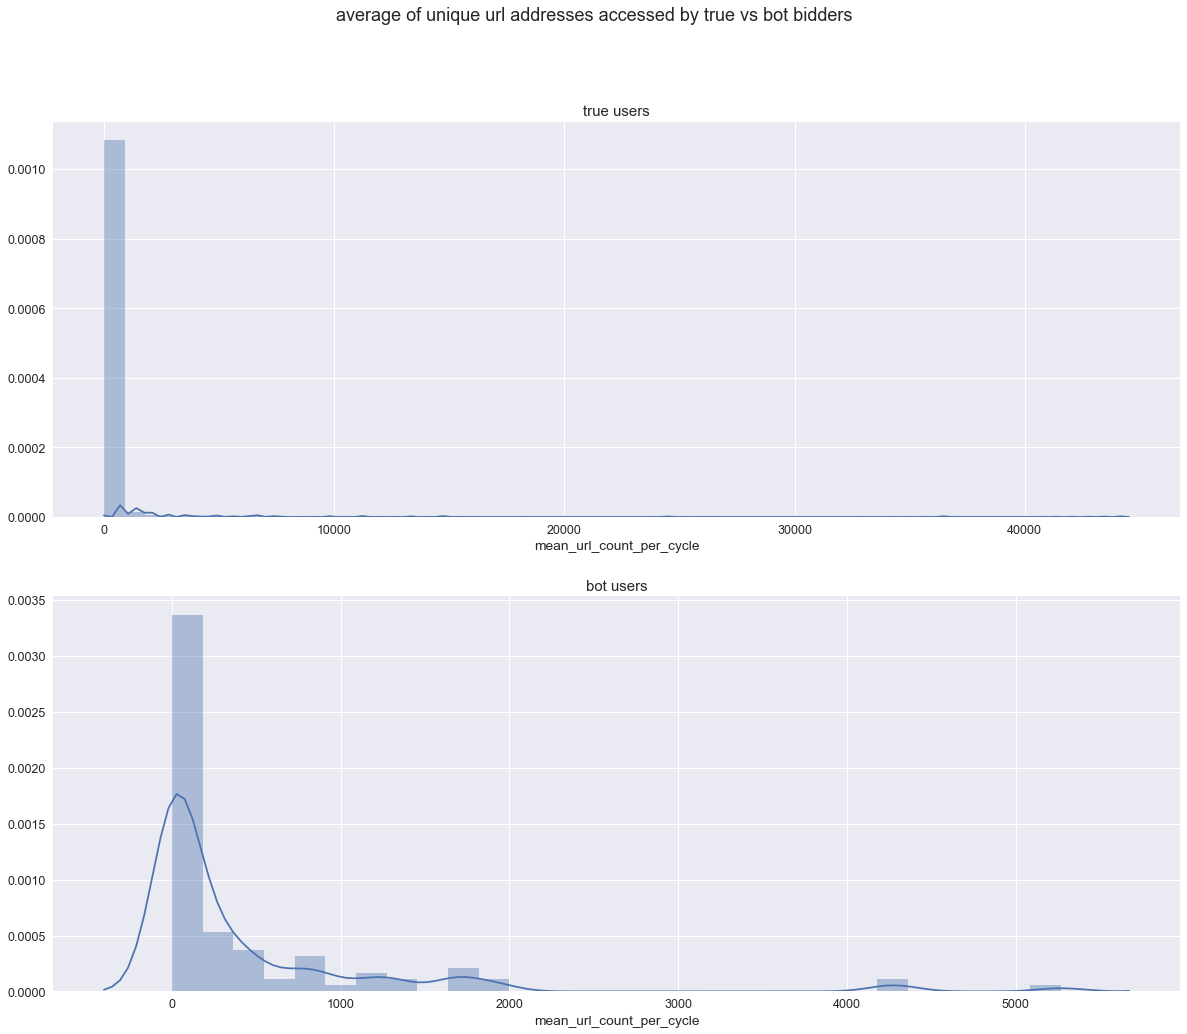

In [1225]:
sns.set(font_scale=1.25)
plt.figure(figsize=(18,16))

plt.subplot(211)
plt.suptitle("average of unique url addresses accessed by true vs bot bidders ")

plt.title("true users")
sns.distplot(bids_w_url_count[bids_w_url_count.outcome==0].groupby(['bidder_id'])['mean_url_count_per_cycle'].mean())

plt.subplot(212)
plt.title("bot users")
sns.distplot(bids_w_url_count[bids_w_url_count.outcome==1].groupby(['bidder_id'])['mean_url_count_per_cycle'].mean())


print stats.ttest_ind(bids_w_url_count[bids_w_url_count.outcome==0].groupby(['bidder_id'])['mean_url_count_per_cycle'].mean(),bids_w_url_count[bids_w_url_count.outcome==1].groupby(['bidder_id'])['mean_url_count_per_cycle'].mean(),equal_var=False)

In [1226]:
#calculate average number of unique devices used per cycle per user
mean_dev_df=bids_w_url_count.groupby(['bidder_id','time_period'])['device'].nunique().sort_values(ascending=False).to_frame().reset_index().groupby(['bidder_id'])['device'].mean().to_frame().reset_index().sort_values(['device'],ascending=False)
mean_dev_df.columns=['bidder_id','mean_dev_count_per_cycle']
bids_w_dev_count=pd.merge(bids_w_url_count,mean_dev_df,on=['bidder_id','bidder_id'],how='left')

Ttest_indResult(statistic=-4.1331564659064366, pvalue=7.0649330895614329e-05)


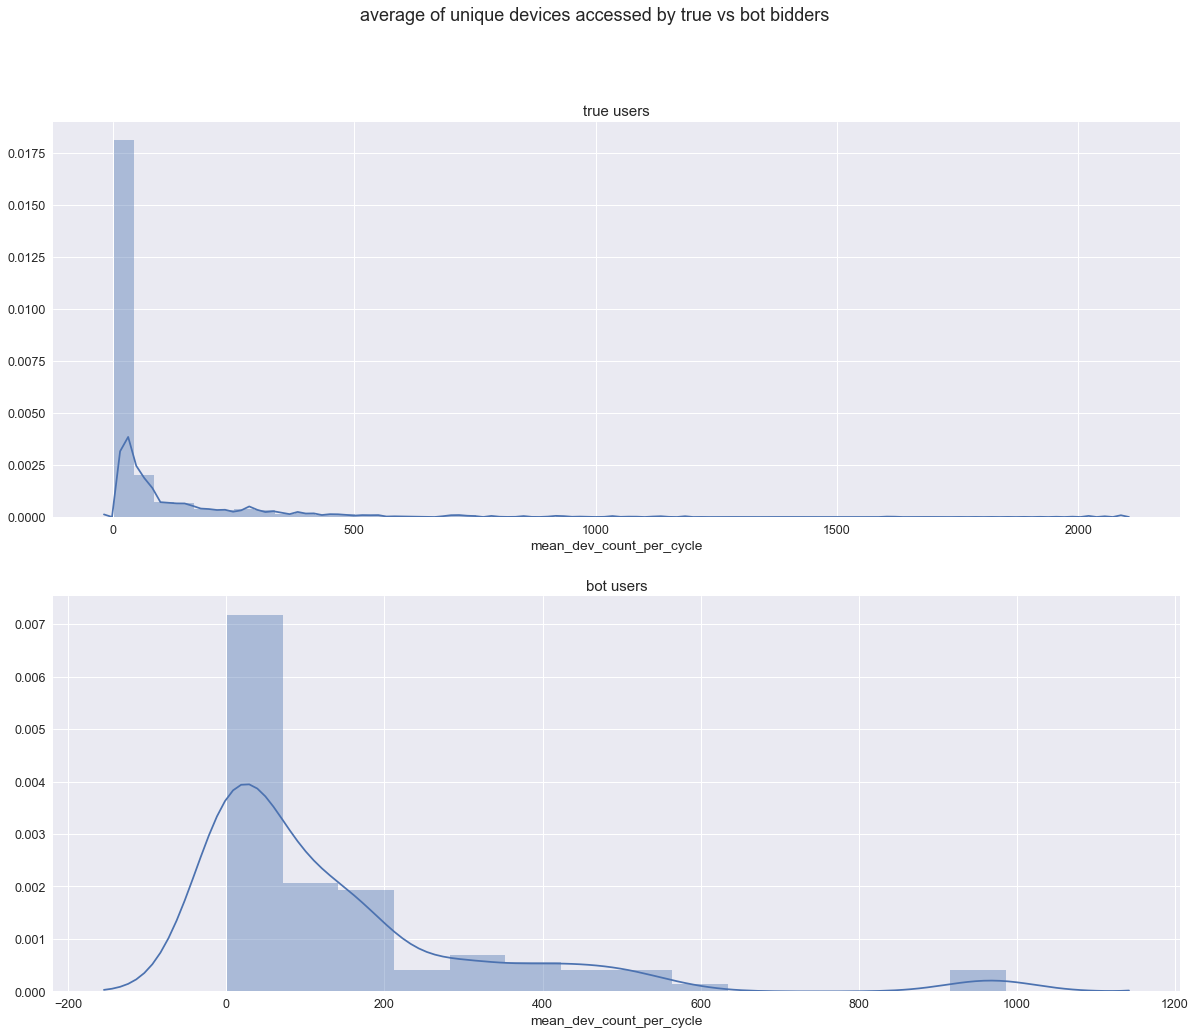

In [1227]:
sns.set(font_scale=1.25)
plt.figure(figsize=(18,16))

plt.subplot(211)
plt.suptitle("average of unique devices accessed by true vs bot bidders ")

plt.title("true users")
sns.distplot(bids_w_dev_count[bids_w_dev_count.outcome==0].groupby(['bidder_id'])['mean_dev_count_per_cycle'].mean())

plt.subplot(212)
plt.title("bot users")
sns.distplot(bids_w_dev_count[bids_w_dev_count.outcome==1].groupby(['bidder_id'])['mean_dev_count_per_cycle'].mean())

print stats.ttest_ind(bids_w_dev_count[bids_w_dev_count.outcome==0].groupby(['bidder_id'])['mean_dev_count_per_cycle'].mean(),bids_w_dev_count[bids_w_dev_count.outcome==1].groupby(['bidder_id'])['mean_dev_count_per_cycle'].mean(),equal_var=False)

Ttest_indResult(statistic=-4.5571979520779182, pvalue=1.3778247638921895e-05)


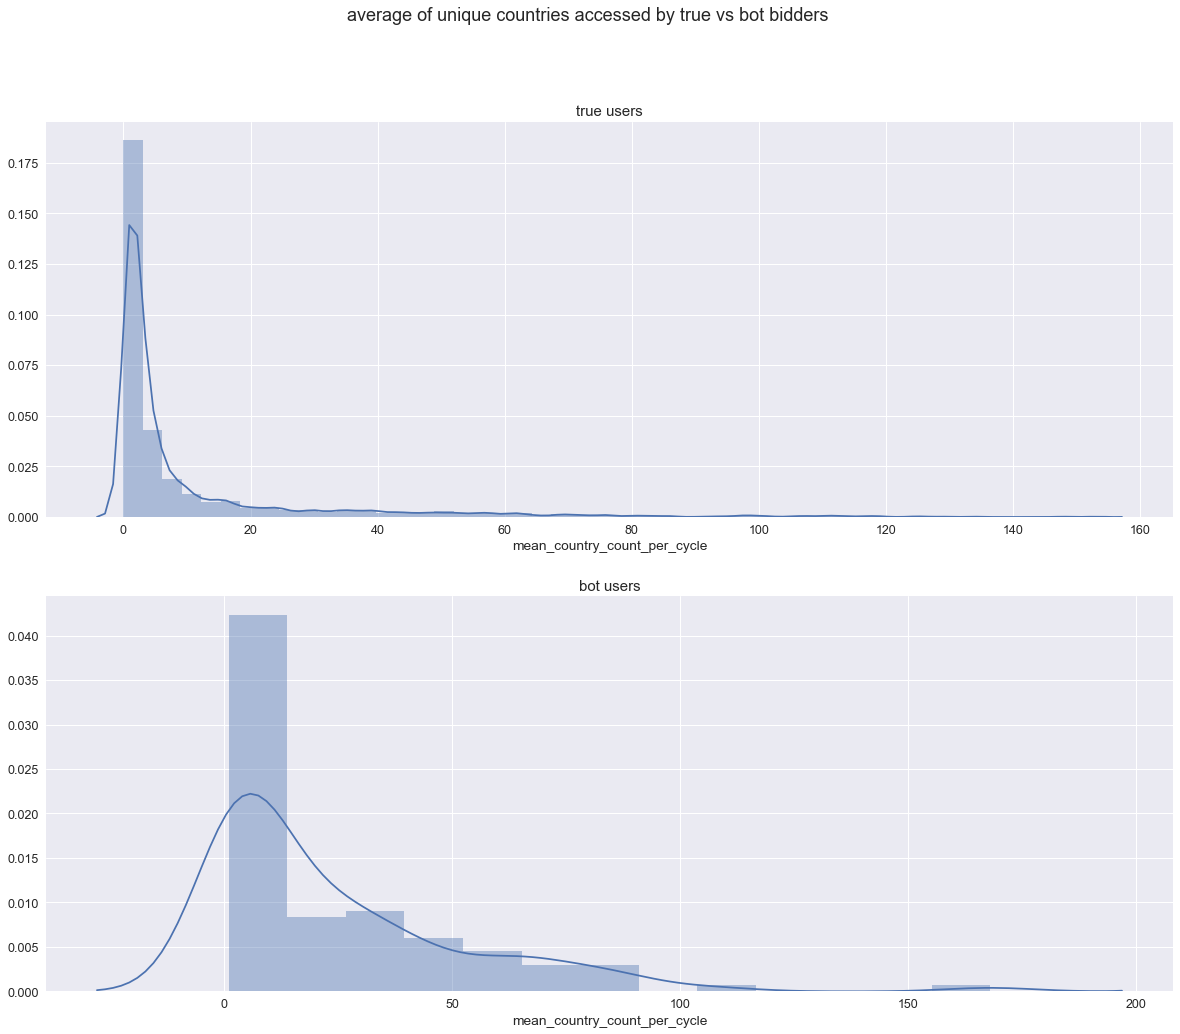

In [1228]:
#calculate average number of unique devices used per cycle per user
mean_co_df=bids_w_dev_count.groupby(['bidder_id','time_period'])['country'].nunique().sort_values(ascending=False).to_frame().reset_index().groupby(['bidder_id'])['country'].mean().to_frame().reset_index().sort_values(['country'],ascending=False)
mean_co_df.columns=['bidder_id','mean_country_count_per_cycle']
bids_w_co_count=pd.merge(bids_w_dev_count,mean_co_df,on=['bidder_id','bidder_id'],how='left')


sns.set(font_scale=1.25)
plt.figure(figsize=(18,16))

plt.subplot(211)
plt.suptitle("average of unique countries accessed by true vs bot bidders ")

plt.title("true users")
sns.distplot(bids_w_co_count[bids_w_co_count.outcome==0].groupby(['bidder_id'])['mean_country_count_per_cycle'].mean())

plt.subplot(212)
plt.title("bot users")
sns.distplot(bids_w_co_count[bids_w_co_count.outcome==1].groupby(['bidder_id'])['mean_country_count_per_cycle'].mean())

print stats.ttest_ind(bids_w_co_count[bids_w_co_count.outcome==0].groupby(['bidder_id'])['mean_country_count_per_cycle'].mean(),bids_w_co_count[bids_w_co_count.outcome==1].groupby(['bidder_id'])['mean_country_count_per_cycle'].mean(),equal_var=False)

Ttest_indResult(statistic=-4.6129333786391937, pvalue=1.1114071324470328e-05)


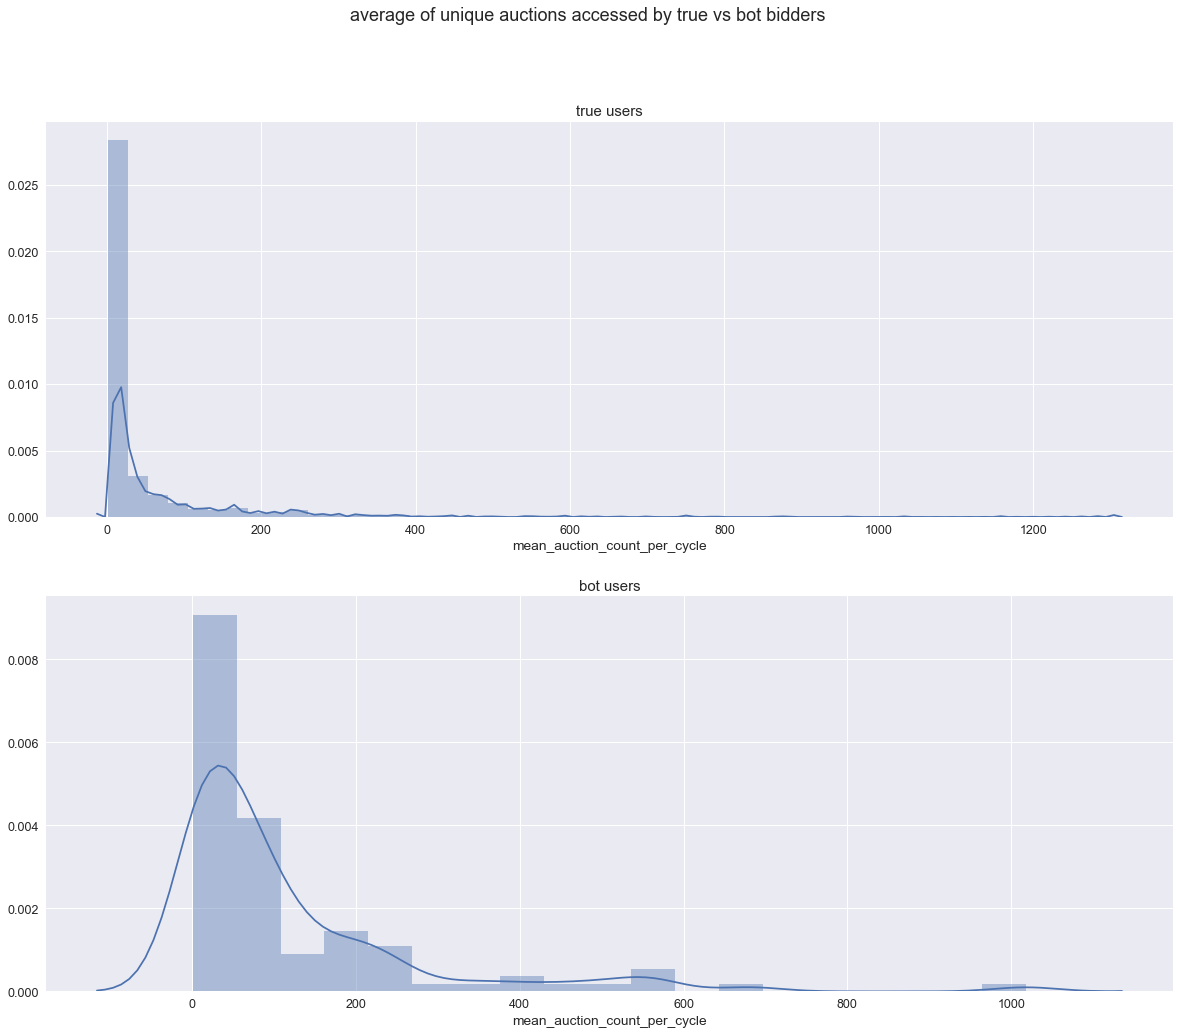

In [1229]:
#calculate average number of unique devices used per cycle per user
mean_au_df=bids_w_co_count.groupby(['bidder_id','time_period'])['auction'].nunique().sort_values(ascending=False).to_frame().reset_index().groupby(['bidder_id'])['auction'].mean().to_frame().reset_index().sort_values(['auction'],ascending=False)
mean_au_df.columns=['bidder_id','mean_auction_count_per_cycle']
bids_w_au_count=pd.merge(bids_w_co_count,mean_au_df,on=['bidder_id','bidder_id'],how='left')


sns.set(font_scale=1.25)
plt.figure(figsize=(18,16))

plt.subplot(211)
plt.suptitle("average of unique auctions accessed by true vs bot bidders ")

plt.title("true users")
sns.distplot(bids_w_au_count[bids_w_au_count.outcome==0].groupby(['bidder_id'])['mean_auction_count_per_cycle'].mean())

plt.subplot(212)
plt.title("bot users")
sns.distplot(bids_w_au_count[bids_w_au_count.outcome==1].groupby(['bidder_id'])['mean_auction_count_per_cycle'].mean())

print stats.ttest_ind(bids_w_au_count[bids_w_au_count.outcome==0].groupby(['bidder_id'])['mean_auction_count_per_cycle'].mean(),bids_w_au_count[bids_w_au_count.outcome==1].groupby(['bidder_id'])['mean_auction_count_per_cycle'].mean(),equal_var=False)

## FG1: Device, Auction, and Country Bot Scores
I initially took the percentages of bots to total users for the devices, auctions, and countries and created scores for each user. However, this ended up significantly overfitting the data later during model testing, showing that the qualities of bots in the training set are not representative of the entire bot population. 

In [1230]:
score1=perc_df_device.reset_index()[['device','percent_robot_device']]
score1.columns=['device','percent_robot_device']
bids_w_scores1=pd.merge(bids_w_au_count,score1,on=['device','device'],how='left')

score2=perc_df_auction.reset_index()[['auction','percent_robot_auction']]
score2.columns=['auction','percent_robot_auction']
bids_w_scores2=pd.merge(bids_w_scores1,score2,on=['auction','auction'],how='left')

score3=perc_df_country.reset_index()[['country','percent_robot_country']]
score3.columns=['country','percent_robot_country']
bids_w_scores3=pd.merge(bids_w_scores2,score3,on=['country','country'],how='left')

In [1231]:
botlist=bids_w_scores3[bids_w_scores3.outcome==1]['bidder_id'].value_counts().index.tolist()
truelist=bids_w_scores3[bids_w_scores3.outcome==0]['bidder_id'].value_counts().index.tolist()

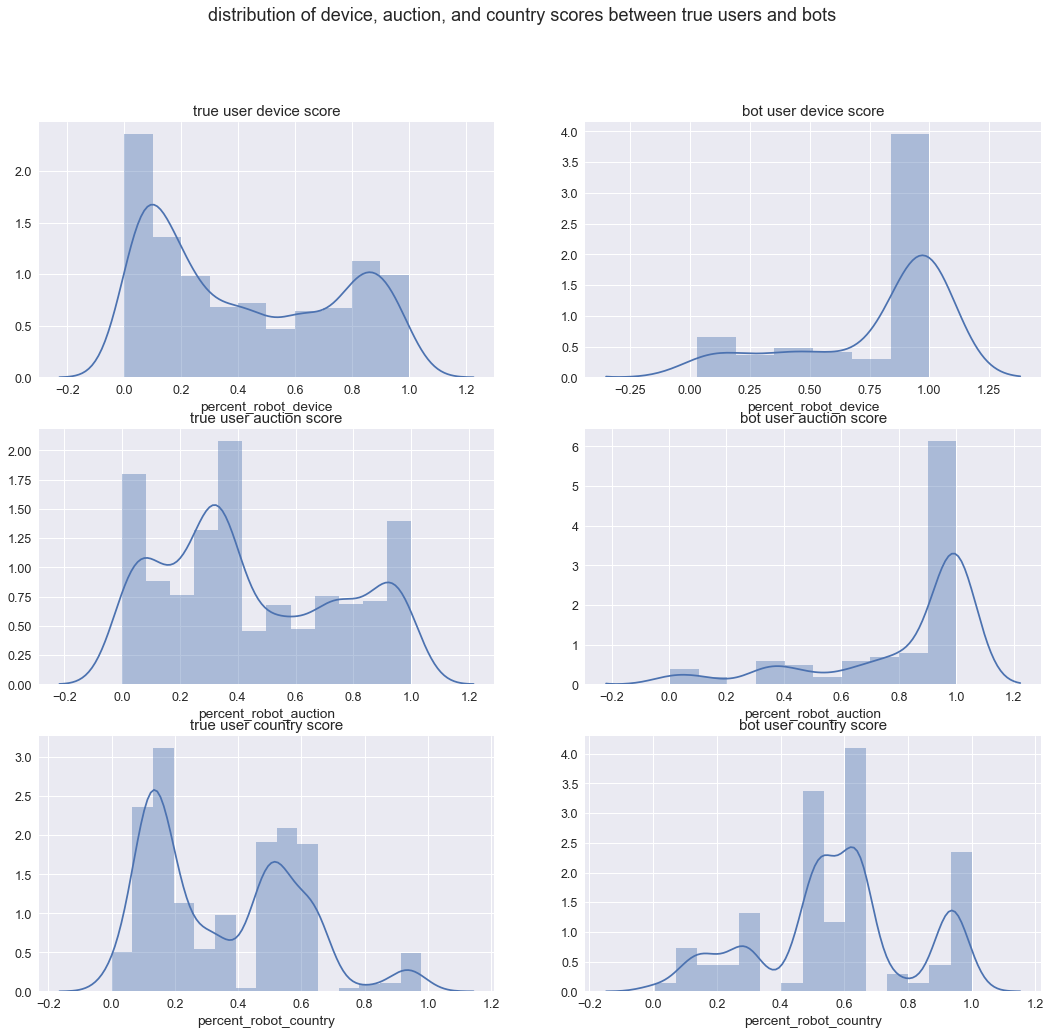

In [1233]:
b3=bids_w_scores3.groupby('bidder_id')[['percent_robot_device','percent_robot_auction','percent_robot_country']].max().reset_index()


plt.figure(figsize=(16,16))
plt.suptitle("distribution of device, auction, and country scores between true users and bots")
plt.subplot(321)
plt.title("true user device score")
sns.distplot(b3[b3.bidder_id.isin(truelist)].sort_values(['percent_robot_device'],ascending=False)['percent_robot_device'])

plt.subplot(322)
plt.title("bot user device score")
sns.distplot(b3[b3.bidder_id.isin(botlist)].sort_values(['percent_robot_device'],ascending=False)['percent_robot_device'])

plt.subplot(323)
plt.title("true user auction score")
sns.distplot(b3[b3.bidder_id.isin(truelist)].sort_values(['percent_robot_auction'],ascending=False)['percent_robot_auction'])

plt.subplot(324)
plt.title("bot user auction score")
sns.distplot(b3[b3.bidder_id.isin(botlist)].sort_values(['percent_robot_auction'],ascending=False)['percent_robot_auction'])

plt.subplot(325)
plt.title("true user country score")
sns.distplot(b3[b3.bidder_id.isin(truelist)].sort_values(['percent_robot_country'],ascending=False)['percent_robot_country'].fillna(0))

plt.subplot(326)
plt.title("bot user country score")
sns.distplot(b3[b3.bidder_id.isin(botlist)].sort_values(['percent_robot_country'],ascending=False)['percent_robot_country'].fillna(0))

In [1234]:
b3['percent_robot_device']=b3['percent_robot_device'].fillna(b3['percent_robot_device'].mean())
b3['percent_robot_auction']=b3['percent_robot_auction'].fillna(b3['percent_robot_auction'].mean())
b3['percent_robot_country']=b3['percent_robot_country'].fillna(b3['percent_robot_country'].mean())
b3.columns=['bidder_id','max_device_score_id','max_auction_score_id','max_country_score_id']
bids_w_scores_max=pd.merge(bids_w_scores3,b3,on=['bidder_id','bidder_id'],how='left')

In [1235]:
#calculate average number of unique url used per cycle per user
mean_robot=bids_w_scores_max.groupby(['bidder_id','percent_robot_device'])['percent_robot_device'].count().sort_values(ascending=False).to_frame().drop(columns=['percent_robot_device']).reset_index().groupby(['bidder_id'])['percent_robot_device'].mean().to_frame().reset_index().sort_values(['percent_robot_device'],ascending=False)
mean_robot.columns=['bidder_id','mean_device_score_id']

mean_auction=bids_w_scores_max.groupby(['bidder_id','percent_robot_auction'])['percent_robot_auction'].count().sort_values(ascending=False).to_frame().drop(columns=['percent_robot_auction']).reset_index().groupby(['bidder_id'])['percent_robot_auction'].mean().to_frame().reset_index().sort_values(['percent_robot_auction'],ascending=False)
mean_auction.columns=['bidder_id','mean_auction_score_id']

mean_country=bids_w_scores_max.groupby(['bidder_id','percent_robot_country'])['percent_robot_country'].count().sort_values(ascending=False).to_frame().drop(columns=['percent_robot_country']).reset_index().groupby(['bidder_id'])['percent_robot_country'].mean().to_frame().reset_index().sort_values(['percent_robot_country'],ascending=False)
mean_country.columns=['bidder_id','mean_country_score_id']

bids_w_scores_mean1=pd.merge(bids_w_scores_max,mean_robot,on=['bidder_id','bidder_id'],how='left')
bids_w_scores_mean2=pd.merge(bids_w_scores_mean1,mean_auction,on=['bidder_id','bidder_id'],how='left')
bids_w_scores_mean=pd.merge(bids_w_scores_mean2,mean_country,on=['bidder_id','bidder_id'],how='left')


# Feature Generation Continued in Second Notebook